# Impact du COVID-19 sur les ventes du groupe L'Oréal
`Par Maxime ANGOULVENT, Valentine CROIBIEN, Oumaima FARISS`

## Importation des librairies nécessaires

In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_theme(palette = "Reds_r")

## Importation des jeux de données

In [ ]:
FR_YSL = pd.read_csv('extract_audit_data_1.csv')

GB_YSL = pd.read_csv('extract_audit_data_2.csv')

## Ventes de Ysl en France et Grande-Bretagne de 2019 à 2021

In [ ]:
ventes = pd.concat([FR_YSL, GB_YSL])

ventes = ventes.drop(columns = ['brand_code'])

ventes['AOV'] = ventes['sell_out']/ventes['nb_transactions']
ventes['AOV'].fillna('0.0', inplace = True)
ventes['AOV'] = ventes['AOV'].astype('float')

ventes['tx_open'] = (ventes["nb_open"]/ventes["nb_targets"]).round(4)
ventes['tx_click'] = (ventes["nb_click"]/ventes["nb_targets"]).round(4)
ventes['tx_desabo'] = (ventes["nb_desabo"]/ventes["nb_targets"]).round(4)

ventes['delivery_first_contact_date'] = pd.to_datetime(ventes['delivery_first_contact_date'], format='%Y-%m-%d %H:%M:%S')
ventes.insert(0,'year', ventes['delivery_first_contact_date'].dt.year)
ventes['year'] = ventes['year'].astype('str')

ventes['year'].value_counts()

2021    8949
2020    4541
2019     941
Name: year, dtype: int64

## Jeux de données par pays

### France

In [ ]:
ventes_FR = ventes.loc[ventes['country_code' ]=='FR',: ]

ventes_FR.head()

,year,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
0,2021,2021-10-31 09:11:34+00:00,FR,Replenishment,Buyer,1,0,0,0,0.0,0,0,0.0,0.0000,0.0,0.0
1,2021,2021-08-05 09:08:38+00:00,FR,Replenishment,Buyer,9,1,0,0,0.0,0,0,0.0,0.1111,0.0,0.0
2,2021,2021-08-21 09:04:34+00:00,FR,Replenishment,Buyer,2,1,0,0,0.0,0,0,0.0,0.5000,0.0,0.0
3,2021,2021-09-08 09:11:45+00:00,FR,Replenishment,Buyer,1,1,0,0,0.0,0,0,0.0,1.0000,0.0,0.0
4,2021,2021-08-31 09:10:36+00:00,FR,Replenishment,Buyer,1,1,0,0,0.0,0,0,0.0,1.0000,0.0,0.0


### Grande-Bretagne

In [ ]:
ventes_GB = ventes.loc[ventes['country_code' ]=='GB',: ]

ventes_GB.head()

,year,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
0,2021,2021-12-16 18:12:43+00:00,GB,Welcome,Buyer,325,172,20,1,1615.938041,17,16,95.055179,0.5292,0.0615,0.0031
1,2021,2021-12-05 18:07:42+00:00,GB,Welcome,Buyer,482,135,30,0,2321.002741,32,31,72.531336,0.2801,0.0622,0.0000
2,2021,2021-12-03 18:06:28+00:00,GB,Welcome,Buyer,357,181,27,1,1440.660492,22,22,65.484568,0.5070,0.0756,0.0028
3,2021,2021-12-26 18:07:27+00:00,GB,Welcome,Buyer,66,37,3,0,3342.136943,16,7,208.883559,0.5606,0.0455,0.0000
4,2021,2021-11-10 09:08:40+00:00,GB,Welcome,Buyer,161,48,9,0,2575.719285,30,24,85.857310,0.2981,0.0559,0.0000


## Jeux de données par année

In [ ]:
ventes_2019 = ventes.loc[ventes['year' ]=='2019',: ]
ventes_2019 = ventes_2019.drop(columns = ['year'])

ventes_2020 = ventes.loc[ventes['year' ]=='2020',: ]
ventes_2020 =ventes_2020.drop(columns = ['year'])

ventes_2021 = ventes.loc[ventes['year' ]=='2021',: ]
ventes_2021 = ventes_2021.drop(columns = ['year'])



In [ ]:
ventes_2019_2020 = ventes.loc[ventes['year' ]!='2021' , :]
ventes_2019_2020 = ventes_2019_2020.drop(columns = ['year'])
ventes_2019_2020.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
426,2019-08-30 13:05:10+00:00,FR,Welcome,Buyer,12,6,3,0,0.0,0,0,0.0,0.5000,0.2500,0.0
427,2020-04-28 13:01:12+00:00,FR,Welcome,Buyer,9,7,1,0,0.0,0,0,0.0,0.7778,0.1111,0.0
428,2020-05-21 13:01:00+00:00,FR,Welcome,Buyer,7,3,0,0,0.0,0,0,0.0,0.4286,0.0000,0.0
429,2020-05-25 13:01:11+00:00,FR,Welcome,Buyer,8,3,2,0,0.0,0,0,0.0,0.3750,0.2500,0.0
430,2020-05-12 13:01:41+00:00,FR,Welcome,Buyer,7,6,3,0,0.0,0,0,0.0,0.8571,0.4286,0.0


In [ ]:
ventes_FR_2019_2020 = ventes_2019_2020 .loc[ventes_2019_2020['country_code' ]=='FR',: ]
ventes_FR_2019_2020.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
426,2019-08-30 13:05:10+00:00,FR,Welcome,Buyer,12,6,3,0,0.0,0,0,0.0,0.5000,0.2500,0.0
427,2020-04-28 13:01:12+00:00,FR,Welcome,Buyer,9,7,1,0,0.0,0,0,0.0,0.7778,0.1111,0.0
428,2020-05-21 13:01:00+00:00,FR,Welcome,Buyer,7,3,0,0,0.0,0,0,0.0,0.4286,0.0000,0.0
429,2020-05-25 13:01:11+00:00,FR,Welcome,Buyer,8,3,2,0,0.0,0,0,0.0,0.3750,0.2500,0.0
430,2020-05-12 13:01:41+00:00,FR,Welcome,Buyer,7,6,3,0,0.0,0,0,0.0,0.8571,0.4286,0.0


## Jeux de données par pays et par année

### France

In [ ]:
ventes_FR['year'].value_counts()

2021    4904
2020    1084
2019     446
Name: year, dtype: int64

In [ ]:
ventes_FR_2019 = ventes_FR.loc[ventes_FR['year' ]=='2019',: ]
ventes_FR_2019 = ventes_FR_2019.drop(columns = ['year'])

ventes_FR_2020 = ventes_FR.loc[ventes_FR['year' ]=='2020',: ]
ventes_FR_2020 = ventes_FR_2020.drop(columns = ['year'])

ventes_FR_2021 = ventes_FR.loc[ventes_FR['year' ]=='2021',: ]
ventes_FR_2021 = ventes_FR_2021.drop(columns = ['year'])

### Grande-Bretagne

In [ ]:
ventes_GB['year'].value_counts()

2021    4045
2020    3457
2019     495
Name: year, dtype: int64

In [ ]:
ventes_GB_2019 = ventes_GB.loc[ventes_GB['year' ]=='2019',: ]
ventes_GB_2019 = ventes_GB_2019.drop(columns = ['year'])

ventes_GB_2020 = ventes_GB.loc[ventes_GB['year' ]=='2020',: ]
ventes_GB_2020 = ventes_GB_2020.drop(columns = ['year'])

ventes_GB_2021 = ventes_GB.loc[ventes_GB['year' ]=='2021',: ]
ventes_GB_2021 = ventes_GB_2021.drop(columns = ['year'])

## Statistiques descriptives

### En 2019

#### Analyse FR et GB confondues

In [ ]:
ventes_2019.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
426,2019-08-30 13:05:10+00:00,FR,Welcome,Buyer,12,6,3,0,0.0,0,0,0.0,0.5000,0.2500,0.0
433,2019-11-10 13:01:26+00:00,FR,Welcome,Buyer,7,5,3,0,0.0,0,0,0.0,0.7143,0.4286,0.0
434,2019-12-27 13:01:24+00:00,FR,Welcome,Prospect,1,1,0,0,0.0,0,0,0.0,1.0000,0.0000,0.0
435,2019-11-21 13:01:28+00:00,FR,Welcome,Prospect,3,1,1,0,0.0,0,0,0.0,0.3333,0.3333,0.0
436,2019-09-06 13:03:36+00:00,FR,Welcome,Buyer,13,3,1,0,0.0,0,0,0.0,0.2308,0.0769,0.0


In [ ]:
ventes_2019.shape
# 941 campagnes en 2019 

(941, 15)

In [ ]:
table = ['ventes_2019']
for i, df in enumerate([ventes_2019]) :
    print("Dataframe :", table[i])
    print("\nInfos :")
    print(df.info())
    print("\nNombres de campagnes et de variables :")
    print(df.shape)
    print("\nDescription des variables quantitatives :")
    print(df.describe())
    print("\nDescription des variables qualitatives:")
    print(df.describe(include = ['O']))
    print("\nValeurs manquantes :")
    print(df.isnull().sum())
    print('-'*20)
    print('\n'*2)

Dataframe : ventes_2019

Infos :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 426 to 7949
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   delivery_first_contact_date  941 non-null    datetime64[ns, UTC]
 1   country_code                 941 non-null    object             
 2   nature                       941 non-null    object             
 3   contact_type                 941 non-null    object             
 4   nb_targets                   941 non-null    int64              
 5   nb_open                      941 non-null    int64              
 6   nb_click                     941 non-null    int64              
 7   nb_desabo                    941 non-null    int64              
 8   sell_out                     941 non-null    float64            
 9   nb_transactions              941 non-null    int64              
 10  nb_buyers     

#####country code

In [ ]:
ventes_2019['country_code'].unique()
# nous nous sommes intéressés à ces deux pays car ils ont eu une politique très différente concernant le covid 

array(['FR', 'GB'], dtype=object)

In [ ]:
ventes_2019['country_code'].value_counts()
# plus de ventes en france d'après nos données 

GB    495
FR    446
Name: country_code, dtype: int64

##### nature

In [ ]:
ventes_2019['nature'].unique()

array(['Welcome', 'Thank_you', 'Replenishment'], dtype=object)

In [ ]:
ventes_2019['nature'].value_counts()
# welcome très répendu, replenishment beaucoup moins 

Welcome          781
Thank_you         97
Replenishment     63
Name: nature, dtype: int64

##### contact type 

In [ ]:
ventes_2019['contact_type'].unique()

array(['Buyer', 'Prospect'], dtype=object)

In [ ]:
ventes_2019['contact_type'].value_counts()

Prospect    554
Buyer       387
Name: contact_type, dtype: int64

##### nb targets

In [ ]:
ventes_2019['nb_targets'].describe()

count     941.000000
mean       31.700319
std       123.296699
min         1.000000
25%         4.000000
50%         9.000000
75%        22.000000
max      2295.000000
Name: nb_targets, dtype: float64

In [ ]:
print(ventes_2019['nb_targets'].sum(), 'individus sont ciblés en 2019 ')
print(ventes_2019['nb_targets'].median(), 'individus médians sont ciblés en 2019 ')

29830 individus sont ciblés en 2019 
9.0 individus médians sont ciblés en 2019 


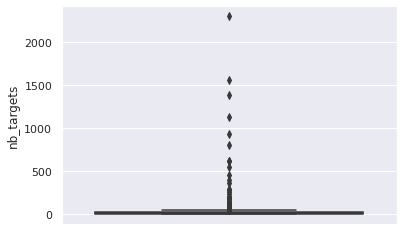

In [ ]:
sns.boxplot( y=ventes_2019["nb_targets"] );

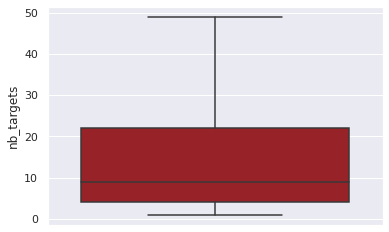

In [ ]:
# sans les valeurs influentes 
sns.boxplot( y=ventes_2019["nb_targets"],showfliers=False );

##### nb open

In [ ]:
ventes_2019['nb_open'].describe()

count    941.000000
mean       7.380446
std       20.573578
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max      335.000000
Name: nb_open, dtype: float64

In [ ]:
print(ventes_2019['nb_open'].sum(), 'individus ont ouvert les mails  en 2019 ')
print(ventes_2019['nb_open'].median(), 'individus médians ouvrent le mail en 2019 ')

6945 individus ont ouvert les mails  en 2019 
3.0 individus médians ouvrent le mail en 2019 


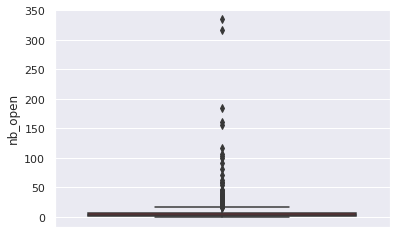

In [ ]:
sns.boxplot( y=ventes_2019["nb_open"] );

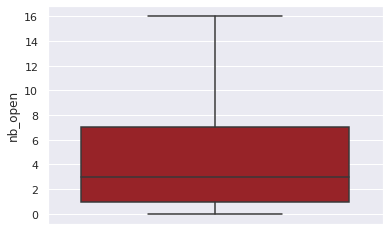

In [ ]:
# sans les valeurs influentes 
sns.boxplot( y=ventes_2019["nb_open"],showfliers=False );

##### nb click

In [ ]:
ventes_2019['nb_click'].describe()

count    941.000000
mean       1.417641
std        3.088218
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       44.000000
Name: nb_click, dtype: float64

In [ ]:
print(ventes_2019['nb_click'].sum(), 'individus ont cliqué sur les mails  en 2019 ')
print(ventes_2019['nb_click'].median(), 'individus médians cliquent sur un mail en 2019 ')

1334 individus ont cliqué sur les mails  en 2019 
0.0 individus médians cliquent sur un mail en 2019 


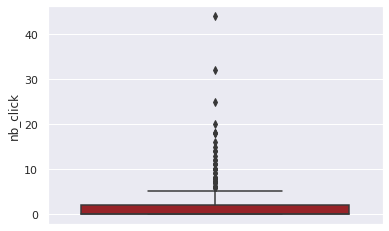

In [ ]:
sns.boxplot( y=ventes_2019["nb_click"] );

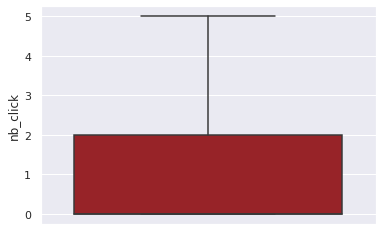

In [ ]:
# sans les valeurs influentes 
sns.boxplot( y=ventes_2019["nb_click"],showfliers=False );

##### nb desabo

In [ ]:
ventes_2019['nb_desabo'].describe()

count    941.000000
mean       0.044633
std        0.299157
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: nb_desabo, dtype: float64

In [ ]:
print(ventes_2019['nb_desabo'].sum(), 'individus ont cliqué sur le bonton se désabonner  en 2019 ')

42 individus ont cliqué sur le bonton se désabonner  en 2019 


##### sell out 

In [ ]:
ventes_2019['sell_out'].describe()

count     941.000000
mean       43.372753
std       124.923785
min         0.000000
25%         0.000000
50%         0.000000
75%        30.240320
max      1451.884303
Name: sell_out, dtype: float64

In [ ]:
print(ventes_2019['sell_out'].sum(), 'euros de chiffres daffaires en 2019 (généré dans les 30 jours suivant le mail)')
print(ventes_2019['sell_out'].median(), 'euros médians pour un envoi de mail en  2019 ')

40813.760365901326 euros de chiffres daffaires en 2019 (généré dans les 30 jours suivant le mail)
0.0 euros médians pour un envoi de mail en  2019 


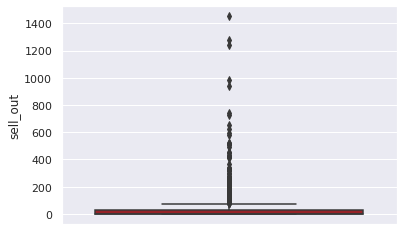

In [ ]:
sns.boxplot( y=ventes_2019["sell_out"] );

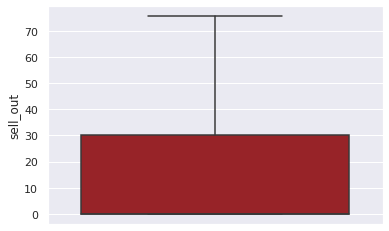

In [ ]:
# sans les valeurs influentes 
sns.boxplot( y=ventes_2019["sell_out"],showfliers=False );

##### nb transactions

In [ ]:
ventes_2019['nb_transactions'].describe()

count    941.000000
mean       0.669501
std        1.874866
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       25.000000
Name: nb_transactions, dtype: float64

In [ ]:
print(ventes_2019['nb_transactions'].sum(), 'nombre de transactions en 2019 (généré dans les 30 jours suivant le mail)')
print(ventes_2019['nb_transactions'].median(), 'nombre de transactions médians pour un envoi de mail en  2019 ')

630 nombre de transactions en 2019 (généré dans les 30 jours suivant le mail)
0.0 nombre de transactions médians pour un envoi de mail en  2019 


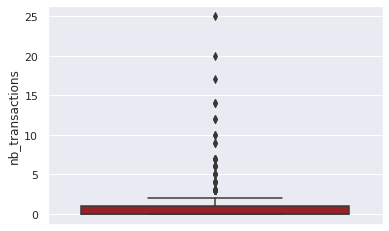

In [ ]:
sns.boxplot( y=ventes_2019["nb_transactions"] );

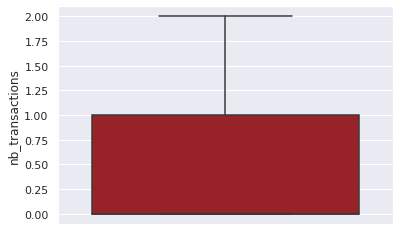

In [ ]:
# sans les valeurs influentes 
sns.boxplot( y=ventes_2019["nb_transactions"],showfliers=False );

##### nb buyers

In [ ]:
ventes_2019['nb_buyers'].describe()

count    941.000000
mean       0.638682
std        1.722551
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       23.000000
Name: nb_buyers, dtype: float64

In [ ]:
print(ventes_2019['nb_buyers'].sum(), 'nombre de contacts ayant fait un achat  en 2019 (généré dans les 30 jours suivant le mail)')
print(ventes_2019['nb_buyers'].median(), 'nombre de contacts médians ayant fait  pour un envoi de mail en  2019 ')

601 nombre de contacts ayant fait un achat  en 2019 (généré dans les 30 jours suivant le mail)
0.0 nombre de contacts médians ayant fait  pour un envoi de mail en  2019 


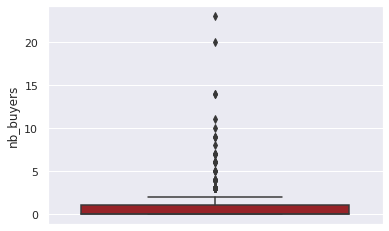

In [ ]:
sns.boxplot( y=ventes_2019["nb_buyers"] );

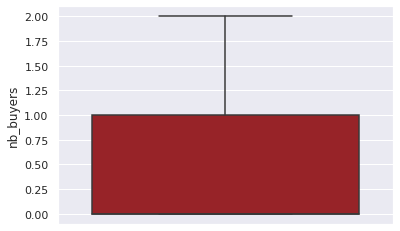

In [ ]:
# sans les valeurs influentes 
sns.boxplot( y=ventes_2019["nb_buyers"],showfliers=False );

##### AOV


In [ ]:
ventes_2019['AOV'].describe()

count    941.000000
mean      18.736953
std       36.521901
min        0.000000
25%        0.000000
50%        0.000000
75%       28.263069
max      246.070000
Name: AOV, dtype: float64

In [ ]:
print(ventes_2019['AOV'].sum(), 'nombre de contacts ayant fait un achat  en 2019 (généré dans les 30 jours suivant le mail)')
print(ventes_2019['AOV'].median(),'nombre de contacts médians ayant fait  pour un envoi de mail en  2019 ')

17631.473113941676 nombre de contacts ayant fait un achat  en 2019 (généré dans les 30 jours suivant le mail)
0.0 nombre de contacts médians ayant fait  pour un envoi de mail en  2019 


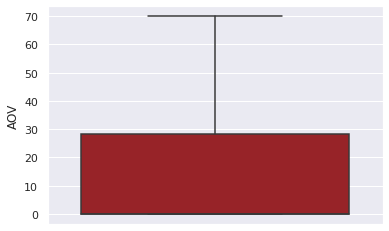

In [ ]:
sns.boxplot( y=ventes_2019["AOV"],showfliers=False );

#### Analyse bivariée


##### Country code

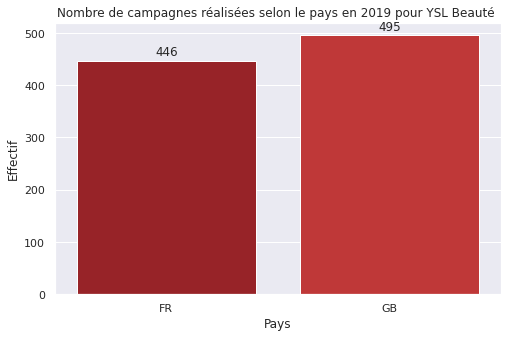

In [ ]:
eff_camp = ventes_2019.groupby('country_code').size()
eff_camp = eff_camp.reset_index().rename(columns={0:'effectif'})

plt.figure(1, figsize=(8, 5))

ax = sns.barplot(x='country_code', y = 'effectif', data = eff_camp)
ax.set(xlabel="Pays", ylabel = "Effectif")
plt.title("Nombre de campagnes réalisées selon le pays en 2019 pour YSL Beauté ")


for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

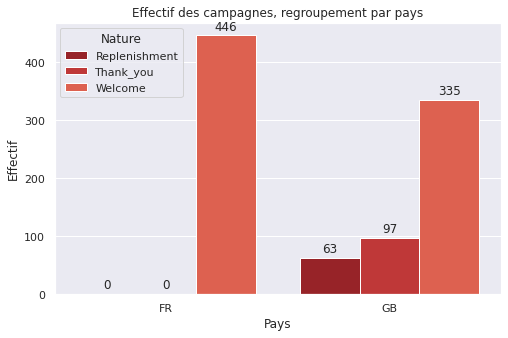

In [ ]:
ct = pd.crosstab(ventes_2019['country_code'], ventes_2019['nature'])


# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

plt.figure(1,figsize=(8, 5))
# plot grouped bar chart
ax = sns.barplot(x=stacked.country_code, y=stacked.value, hue=stacked.nature)
ax.set_title("Effectif des campagnes, regroupement par pays")
ax.set_xlabel("Pays")
ax.set_ylabel('Effectif')
plt.legend(loc='upper left', title = 'Nature')

for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

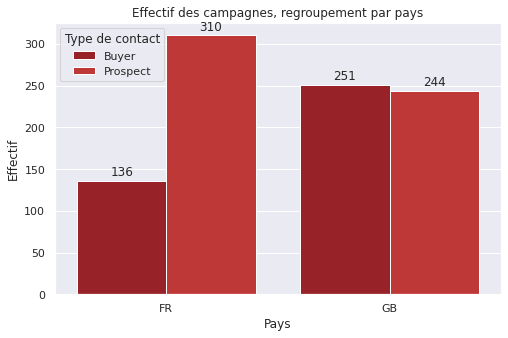

In [ ]:
ct =pd.crosstab(ventes_2019['country_code'], ventes_2019['contact_type'])


# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

plt.figure(1,figsize=(8, 5))
# plot grouped bar chart
ax = sns.barplot(x=stacked.country_code, y=stacked.value, hue=stacked.contact_type)
ax.set_title("Effectif des campagnes, regroupement par pays")
ax.set_xlabel("Pays")
ax.set_ylabel('Effectif')
plt.legend(loc='upper left', title = "Type de contact")

for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

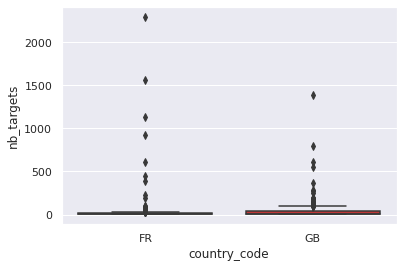

In [ ]:
sns.boxplot(x='country_code', y='nb_targets', data=ventes_2019)

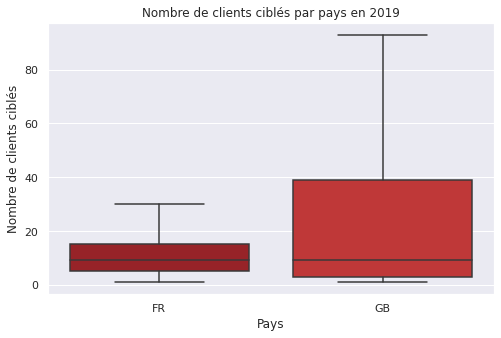

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='nb_targets', showfliers=False, data=ventes_2019)
ax.set(xlabel='Pays', ylabel='Nombre de clients ciblés')
plt.title("Nombre de clients ciblés par pays en 2019")
plt.show()

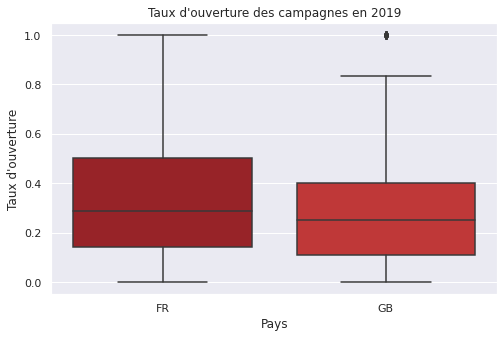

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='tx_open', data=ventes_2019)
ax.set(xlabel='Pays', ylabel="Taux d'ouverture")
plt.title("Taux d'ouverture des campagnes en 2019")
plt.show()

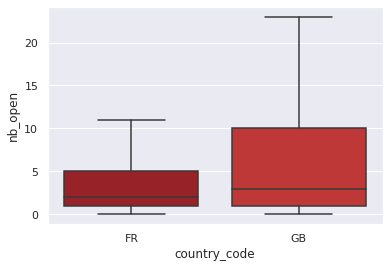

In [ ]:
sns.boxplot(x='country_code', y='nb_open',showfliers=False, data=ventes_2019)

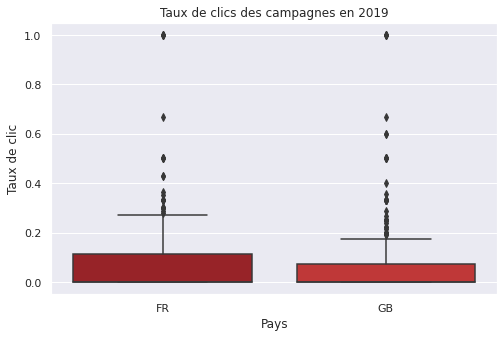

In [ ]:
plt.figure(1, figsize=(8, 5))
ax =sns.boxplot(x='country_code', y='tx_click', data=ventes_2019)
ax.set(xlabel='Pays', ylabel="Taux de clic")
plt.title("Taux de clics des campagnes en 2019")
plt.show()

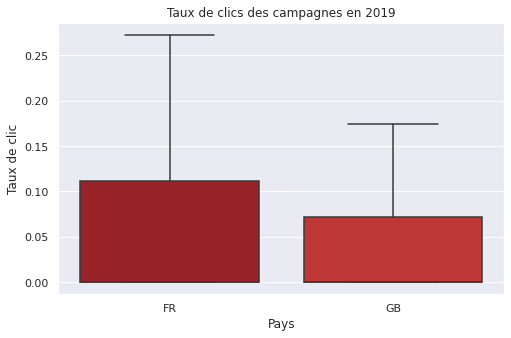

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='tx_click', data=ventes_2019, showfliers = False)
ax.set(xlabel='Pays', ylabel="Taux de clic")
plt.title("Taux de clics des campagnes en 2019")
plt.show()

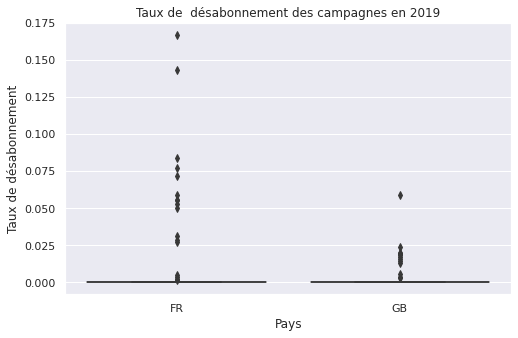

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='tx_desabo', data=ventes_2019)
ax.set(xlabel='Pays', ylabel="Taux de désabonnement")
plt.title("Taux de  désabonnement des campagnes en 2019")
plt.show()

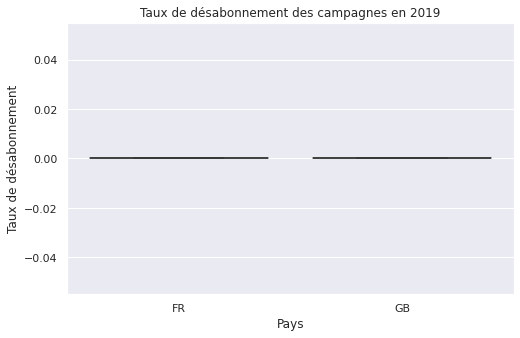

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='tx_desabo', data=ventes_2019, showfliers = False)
ax.set(xlabel='Pays', ylabel="Taux de désabonnement")
plt.title("Taux de désabonnement des campagnes en 2019")
plt.show()

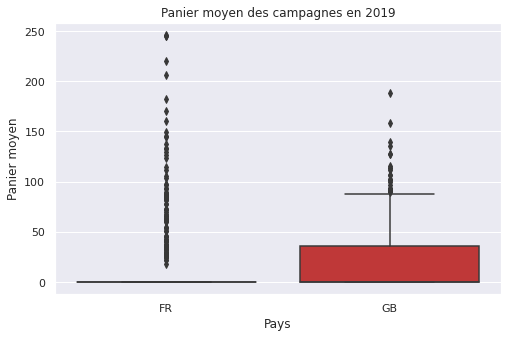

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='AOV', data=ventes_2019)
ax.set(xlabel='Pays', ylabel="Panier moyen")
plt.title("Panier moyen des campagnes en 2019")
plt.show()

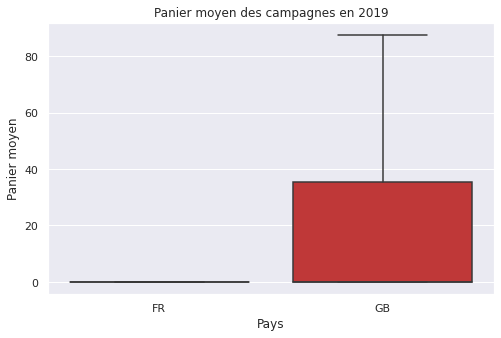

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='AOV', data=ventes_2019, showfliers = False)
ax.set(xlabel='Pays', ylabel="Panier moyen")
plt.title("Panier moyen des campagnes en 2019")
plt.show()

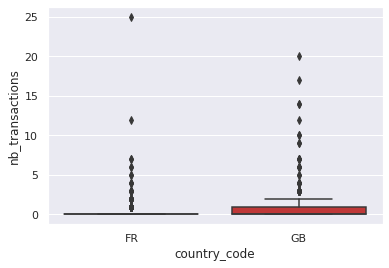

In [ ]:
sns.boxplot(x='country_code', y='nb_transactions', data=ventes_2019)

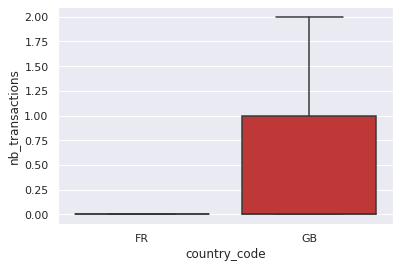

In [ ]:
sns.boxplot(x='country_code', y='nb_transactions',showfliers=False, data=ventes_2019)

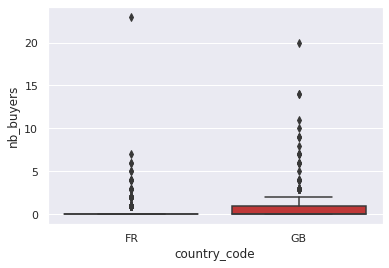

In [ ]:
sns.boxplot(x='country_code', y='nb_buyers', data=ventes_2019)

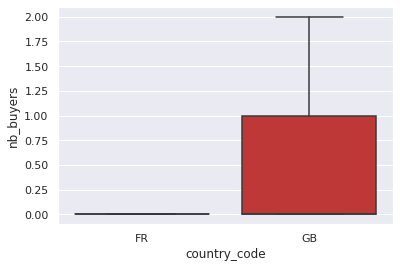

In [ ]:
sns.boxplot(x='country_code', y='nb_buyers',showfliers=False, data=ventes_2019)

##### différence du panier moyen entre les pays 

In [ ]:
ventes_FR_2019['AOV'].describe()

count    446.000000
mean      16.731648
std       40.091271
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      246.070000
Name: AOV, dtype: float64

In [ ]:
ventes_GB_2019['AOV'].describe()

count    495.000000
mean      20.543753
std       32.913700
min        0.000000
25%        0.000000
50%        0.000000
75%       35.416067
max      188.071531
Name: AOV, dtype: float64

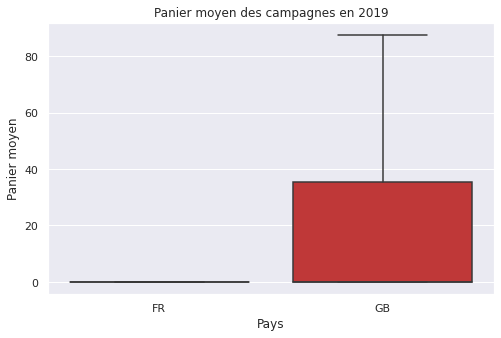

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='AOV', data=ventes_2019, showfliers = False)
ax.set(xlabel='Pays', ylabel="Panier moyen")
plt.title("Panier moyen des campagnes en 2019")
plt.show()

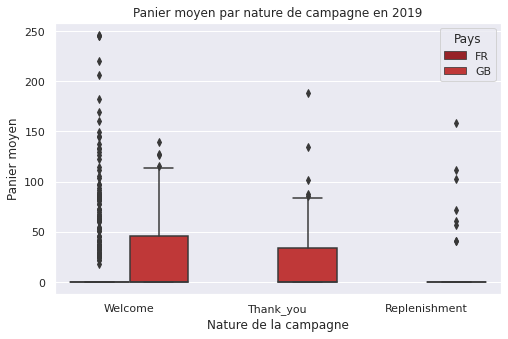

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='nature', y='AOV', hue = 'country_code', data=ventes_2019)
ax.set(xlabel='Nature de la campagne', ylabel="Panier moyen")
plt.title("Panier moyen par nature de campagne en 2019")
plt.legend(title='Pays')
plt.show()

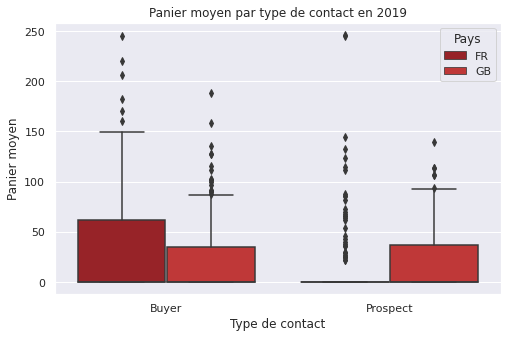

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='contact_type', y='AOV', hue='country_code', data=ventes_2019)
ax.set(xlabel='Type de contact', ylabel="Panier moyen")
plt.title("Panier moyen par type de contact en 2019")
plt.legend(title='Pays')
plt.show()

In [ ]:
campagnes_nulles = ventes_2019.loc[ventes_2019['sell_out'] == 0, : ]

df = campagnes_nulles['country_code'].value_counts().rename_axis('country_code').reset_index(name='Effectif_nulles')

df2 = ventes_2019['country_code'].value_counts().rename_axis('country_code').reset_index(name='Effectif_campagnes')

df = df.merge(df2, how = 'inner', on ='country_code')

df['Pourcentage_nulles'] = df['Effectif_nulles']/df['Effectif_campagnes']*100

df

,country_code,Effectif_nulles,Effectif_campagnes,Pourcentage_nulles
0,FR,349,446,78.251121
1,GB,320,495,64.646465


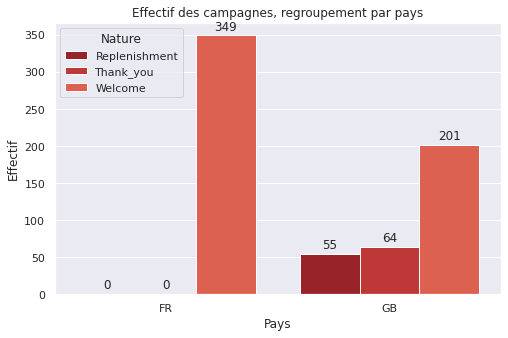

In [ ]:
ct = pd.crosstab(campagnes_nulles['country_code'], campagnes_nulles['nature'])


# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

plt.figure(1,figsize=(8, 5))
# plot grouped bar chart
ax = sns.barplot(x=stacked.country_code, y=stacked.value, hue=stacked.nature)
ax.set_title("Effectif des campagnes, regroupement par pays")
ax.set_xlabel("Pays")
ax.set_ylabel('Effectif')
plt.legend(loc='upper left', title = 'Nature')

for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

In [ ]:
campagnes_bonnes = ventes_2019.loc[ventes_2019['sell_out'] != 0, : ]

campagnes_bonnes['country_code'].value_counts()

GB    175
FR     97
Name: country_code, dtype: int64

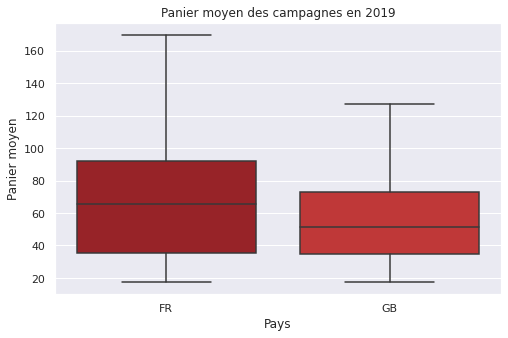

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='country_code', y='AOV', data=campagnes_bonnes, showfliers = False)
ax.set(xlabel='Pays', ylabel="Panier moyen")
plt.title("Panier moyen des campagnes en 2019")
plt.show()

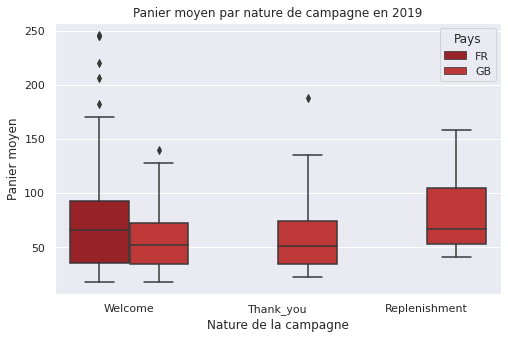

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='nature', y='AOV', hue = 'country_code', data=campagnes_bonnes)
ax.set(xlabel='Nature de la campagne', ylabel="Panier moyen")
plt.title("Panier moyen par nature de campagne en 2019")
plt.legend(title='Pays')
plt.show()

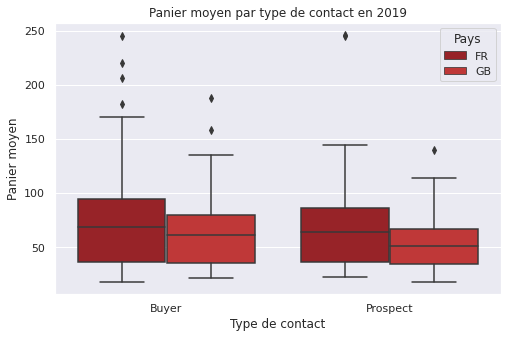

In [ ]:
plt.figure(1, figsize=(8, 5))
ax = sns.boxplot(x='contact_type', y='AOV', hue='country_code', data=campagnes_bonnes)
ax.set(xlabel='Type de contact', ylabel="Panier moyen")
plt.title("Panier moyen par type de contact en 2019")
plt.legend(title='Pays')
plt.show()

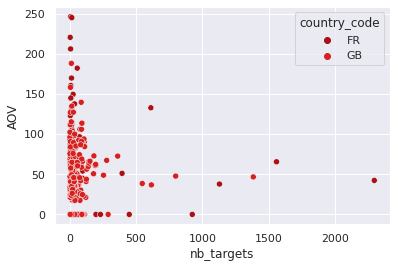

In [ ]:
sns.scatterplot(x='nb_targets', y='AOV',hue='country_code', data=ventes_2019)

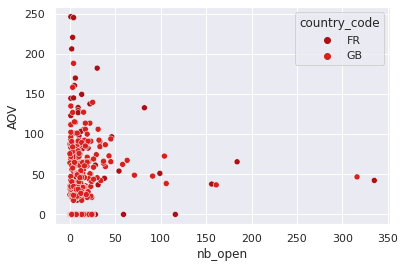

In [ ]:
sns.scatterplot(x='nb_open', y='AOV',hue='country_code', data=ventes_2019)

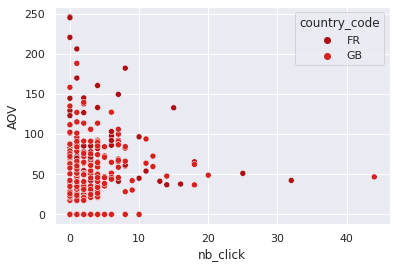

In [ ]:
sns.scatterplot(x='nb_click', y='AOV',hue='country_code', data=ventes_2019)

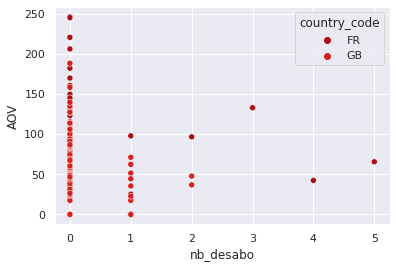

In [ ]:
sns.scatterplot(x='nb_desabo', y='AOV',hue='country_code', data=ventes_2019)

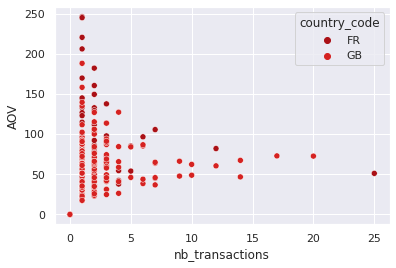

In [ ]:
sns.scatterplot(x='nb_transactions', y='AOV',hue='country_code', data=ventes_2019)

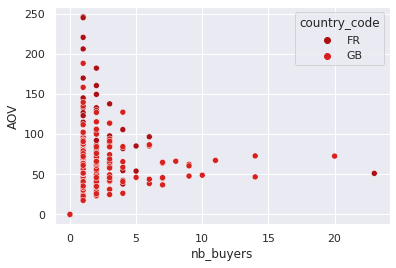

In [ ]:
sns.scatterplot(x='nb_buyers', y='AOV',hue='country_code', data=ventes_2019)

##### différence du nombre de buyers par pays 

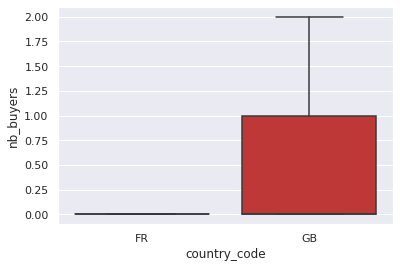

In [ ]:
sns.boxplot(x='country_code', y='nb_buyers',showfliers=False, data=ventes_2019)

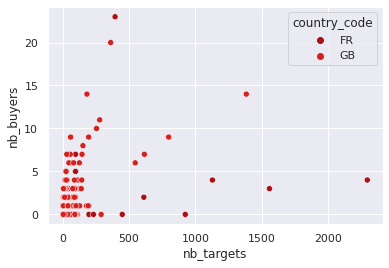

In [ ]:
sns.scatterplot(x='nb_targets', y='nb_buyers',hue='country_code', data=ventes_2019)

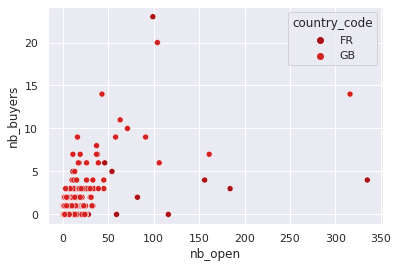

In [ ]:
sns.scatterplot(x='nb_open', y='nb_buyers',hue='country_code', data=ventes_2019)

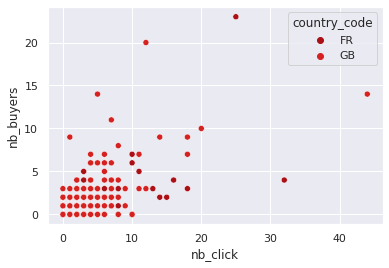

In [ ]:
sns.scatterplot(x='nb_click', y='nb_buyers',hue='country_code', data=ventes_2019)

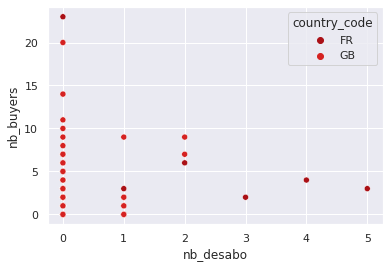

In [ ]:
sns.scatterplot(x='nb_desabo', y='nb_buyers',hue='country_code', data=ventes_2019)

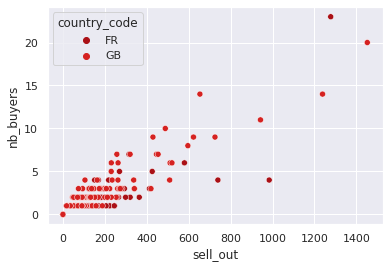

In [ ]:
sns.scatterplot(x='sell_out', y='nb_buyers',hue='country_code', data=ventes_2019)

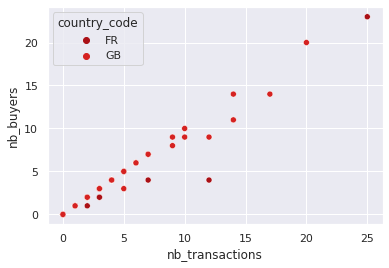

In [ ]:
sns.scatterplot(x='nb_transactions', y='nb_buyers',hue='country_code', data=ventes_2019)

#### En France

In [ ]:
ventes_FR_2019.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
426,2019-08-30 13:05:10+00:00,FR,Welcome,Buyer,12,6,3,0,0.0,0,0,0.0,0.5000,0.2500,0.0
433,2019-11-10 13:01:26+00:00,FR,Welcome,Buyer,7,5,3,0,0.0,0,0,0.0,0.7143,0.4286,0.0
434,2019-12-27 13:01:24+00:00,FR,Welcome,Prospect,1,1,0,0,0.0,0,0,0.0,1.0000,0.0000,0.0
435,2019-11-21 13:01:28+00:00,FR,Welcome,Prospect,3,1,1,0,0.0,0,0,0.0,0.3333,0.3333,0.0
436,2019-09-06 13:03:36+00:00,FR,Welcome,Buyer,13,3,1,0,0.0,0,0,0.0,0.2308,0.0769,0.0


In [ ]:
ventes_FR_2019.shape
# 5087 ventes en france en 2019

(446, 15)

In [ ]:
table = ['ventes_FR_2019']
for i, df in enumerate([ventes_FR_2019]) :
    print("Dataframe :", table[i])
    print("Describe :")
    print(df.describe(include='all'))
    print("\n Infos :")
    print(df.info())
    print("\n Valeurs manquantes :")
    print(df.isnull().sum())
    print('-'*20)
    print('\n'*2)

Dataframe : ventes_FR_2019
Describe :
       delivery_first_contact_date country_code  ...    tx_click   tx_desabo
count                          446          446  ...  446.000000  446.000000
unique                         410            1  ...         NaN         NaN
top      2019-03-23 15:13:06+00:00           FR  ...         NaN         NaN
freq                             2          446  ...         NaN         NaN
first    2019-01-01 15:11:52+00:00          NaN  ...         NaN         NaN
last     2019-12-31 13:01:24+00:00          NaN  ...         NaN         NaN
mean                           NaN          NaN  ...    0.076029    0.002044
std                            NaN          NaN  ...    0.134346    0.013555
min                            NaN          NaN  ...    0.000000    0.000000
25%                            NaN          NaN  ...    0.000000    0.000000
50%                            NaN          NaN  ...    0.000000    0.000000
75%                            NaN    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


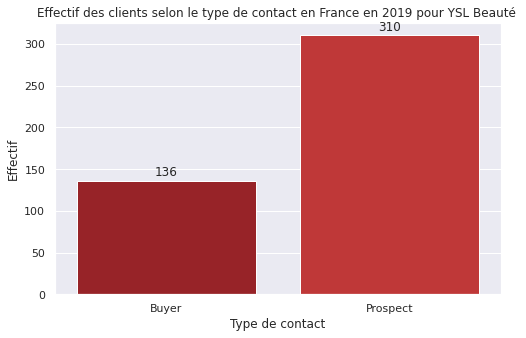

In [ ]:
eff_con_FR = ventes_FR_2019.groupby('contact_type').size()
eff_con_FR = eff_con_FR.reset_index().rename(columns={0:'effectif'})

plt.figure(1, figsize=(8, 5))

ax = sns.barplot(x='contact_type', y = 'effectif', data = eff_con_FR)
ax.set(xlabel="Type de contact", ylabel = "Effectif")
plt.title("Effectif des clients selon le type de contact en France en 2019 pour YSL Beauté ")


for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

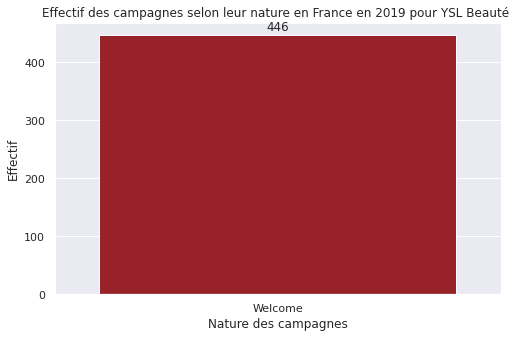

In [ ]:
eff_nature_FR = ventes_FR_2019.groupby('nature').size()
eff_nature_FR = eff_nature_FR.reset_index().rename(columns={0:'effectif'})

plt.figure(1, figsize=(8, 5))

ax = sns.barplot(x='nature', y = 'effectif', data = eff_nature_FR)
ax.set(xlabel="Nature des campagnes", ylabel = "Effectif")
plt.title("Effectif des campagnes selon leur nature en France en 2019 pour YSL Beauté ")


for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

In [ ]:
ventes_FR_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 426 to 6419
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   delivery_first_contact_date  446 non-null    datetime64[ns, UTC]
 1   country_code                 446 non-null    object             
 2   nature                       446 non-null    object             
 3   contact_type                 446 non-null    object             
 4   nb_targets                   446 non-null    int64              
 5   nb_open                      446 non-null    int64              
 6   nb_click                     446 non-null    int64              
 7   nb_desabo                    446 non-null    int64              
 8   sell_out                     446 non-null    float64            
 9   nb_transactions              446 non-null    int64              
 10  nb_buyers                    446 non-null    in

#### En Grande-Bretagne

In [ ]:
ventes_GB_2019.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
287,2019-11-13 09:10:08+00:00,GB,Welcome,Buyer,182,43,5,0,1238.387642,17,14,72.846332,0.2363,0.0275,0.0
289,2019-12-05 09:09:24+00:00,GB,Welcome,Buyer,361,104,12,0,1451.884303,20,20,72.594215,0.2881,0.0332,0.0
295,2019-12-14 10:36:28+00:00,GB,Thank_you,Buyer,10,4,1,0,0.000000,0,0,0.000000,0.4000,0.1000,0.0
298,2019-11-19 10:36:46+00:00,GB,Thank_you,Buyer,9,2,0,0,0.000000,0,0,0.000000,0.2222,0.0000,0.0
299,2019-12-17 10:36:37+00:00,GB,Thank_you,Prospect,3,0,0,0,0.000000,0,0,0.000000,0.0000,0.0000,0.0


In [ ]:
ventes_GB_2019.shape
# 2003 ventes en GB en 2019 

(495, 15)

In [ ]:
table = ['ventes_GB_2019']
for i, df in enumerate([ventes_GB_2019]) :
    print("Dataframe :", table[i])
    print("Describe :")
    print(df.describe(include='all'))
    print("\n Infos :")
    print(df.info())
    print("\n Valeurs manquantes :")
    print(df.isnull().sum())
    print('-'*20)
    print('\n'*2)

Dataframe : ventes_GB_2019
Describe :


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


       delivery_first_contact_date country_code  ...    tx_click   tx_desabo
count                          495          495  ...  495.000000  495.000000
unique                         298            1  ...         NaN         NaN
top      2019-11-13 09:10:08+00:00           GB  ...         NaN         NaN
freq                             2          495  ...         NaN         NaN
first    2019-11-06 12:11:28+00:00          NaN  ...         NaN         NaN
last     2019-12-31 12:11:30+00:00          NaN  ...         NaN         NaN
mean                           NaN          NaN  ...    0.060697    0.000462
std                            NaN          NaN  ...    0.129536    0.003568
min                            NaN          NaN  ...    0.000000    0.000000
25%                            NaN          NaN  ...    0.000000    0.000000
50%                            NaN          NaN  ...    0.000000    0.000000
75%                            NaN          NaN  ...    0.072050    0.000000

In [ ]:
ventes_GB_2019.describe()

,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,34.121212,8.282828,1.517172,0.030303,51.801011,0.858586,0.832323,20.543753,0.279166,0.060697,0.000462
std,88.827481,19.543080,3.199698,0.193756,136.315903,2.072619,1.940972,32.913700,0.239360,0.129536,0.003568
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108200,0.000000,0.000000
50%,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
75%,39.000000,10.000000,2.000000,0.000000,50.594382,1.000000,1.000000,35.416067,0.400000,0.072050,0.000000
max,1383.000000,316.000000,44.000000,2.000000,1451.884303,20.000000,20.000000,188.071531,1.000000,1.000000,0.058800


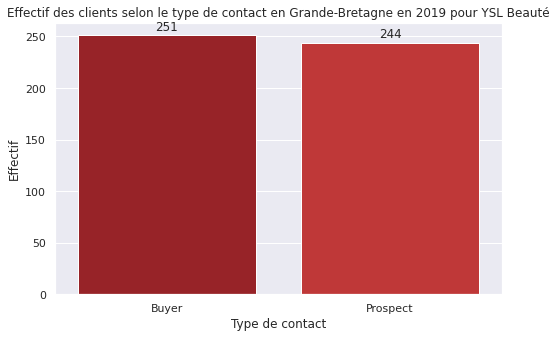

In [ ]:
eff_con_GB = ventes_GB_2019.groupby('contact_type').size()
eff_con_GB = eff_con_GB.reset_index().rename(columns={0:'effectif'})

plt.figure(1, figsize=(8, 5))

ax = sns.barplot(x='contact_type', y = 'effectif', data = eff_con_GB)
ax.set(xlabel="Type de contact", ylabel = "Effectif")
plt.title("Effectif des clients selon le type de contact en Grande-Bretagne en 2019 pour YSL Beauté")


for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

### En 2020

In [ ]:
ventes_2020.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
427,2020-04-28 13:01:12+00:00,FR,Welcome,Buyer,9,7,1,0,0.0,0,0,0.0,0.7778,0.1111,0.0
428,2020-05-21 13:01:00+00:00,FR,Welcome,Buyer,7,3,0,0,0.0,0,0,0.0,0.4286,0.0000,0.0
429,2020-05-25 13:01:11+00:00,FR,Welcome,Buyer,8,3,2,0,0.0,0,0,0.0,0.3750,0.2500,0.0
430,2020-05-12 13:01:41+00:00,FR,Welcome,Buyer,7,6,3,0,0.0,0,0,0.0,0.8571,0.4286,0.0
431,2020-01-29 13:01:39+00:00,FR,Welcome,Buyer,5,2,1,0,0.0,0,0,0.0,0.4000,0.2000,0.0


In [ ]:
table = ['ventes_2020']

for i, df in enumerate([ventes_2020]) :
    print("Dataframe :", table[i])
    print("\nInfos :")
    print(df.info())
    print("\nNombres de campagnes et de variables :")
    print(df.shape)
    print("\nDescription des variables quantitatives :")
    print(df.describe())
    print("\nDescription des variables qualitatives:")
    print(df.describe(include = ['O']))
    print("\nValeurs manquantes :")
    print(df.isnull().sum())
    print('-'*20)
    print('\n'*2)

Dataframe : ventes_2020

Infos :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 427 to 7995
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   delivery_first_contact_date  4541 non-null   datetime64[ns, UTC]
 1   country_code                 4541 non-null   object             
 2   nature                       4541 non-null   object             
 3   contact_type                 4541 non-null   object             
 4   nb_targets                   4541 non-null   int64              
 5   nb_open                      4541 non-null   int64              
 6   nb_click                     4541 non-null   int64              
 7   nb_desabo                    4541 non-null   int64              
 8   sell_out                     4541 non-null   float64            
 9   nb_transactions              4541 non-null   int64              
 10  nb_buyers    

In [ ]:
ventes_2020['country_code'].value_counts()

GB    3457
FR    1084
Name: country_code, dtype: int64

##### Nature de la campagne

In [ ]:
ventes_2020.groupby('country_code')['nature'].value_counts()

country_code  nature       
FR            Welcome          1084
GB            Welcome          2581
              Thank_you         460
              Replenishment     416
Name: nature, dtype: int64

##### Type de contact

In [ ]:
ventes_2020.groupby(['country_code'])['contact_type'].value_counts()

country_code  contact_type
FR            Buyer            594
              Prospect         490
GB            Buyer           1735
              Prospect        1722
Name: contact_type, dtype: int64

##### Nombre de clients ciblés

In [ ]:
ventes_2020['nb_targets'].describe()

count     4541.000000
mean        89.796300
std        488.496466
min          1.000000
25%          6.000000
50%         28.000000
75%         80.000000
max      20999.000000
Name: nb_targets, dtype: float64

In [ ]:
print(ventes_2020['nb_targets'].sum(), 'individus sont ciblés en 2020 ')
print(round(ventes_2020['nb_targets'].mean()), 'individus sont ciblés en moyenne en 2020 ')

407765 individus sont ciblés en 2020 
90 individus sont ciblés en moyenne en 2020 


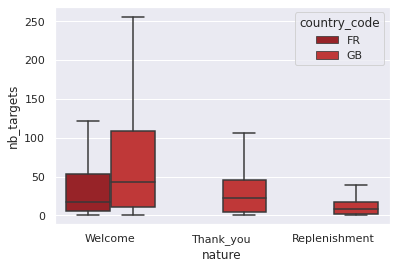

In [ ]:
sns.boxplot(x='nature', y='nb_targets', hue='country_code', data=ventes_2020, showfliers=False)

##### Nombre de désabonnement

In [ ]:
ventes_2020['nb_desabo'].describe()

count    4541.000000
mean        0.326140
std         0.904466
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: nb_desabo, dtype: float64

##### Nombre de transactions

In [ ]:
ventes_2020['nb_transactions'].describe()

count    4541.000000
mean        4.401453
std        10.442977
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       220.000000
Name: nb_transactions, dtype: float64

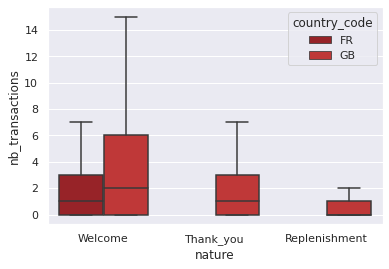

In [ ]:
sns.boxplot(x='nature', y='nb_transactions', hue='country_code', data=ventes_2020, showfliers=False)

##### Nombre d'acheteurs

In [ ]:
ventes_2020['nb_buyers'].describe()

count    4541.000000
mean        4.215151
std         9.710147
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       206.000000
Name: nb_buyers, dtype: float64

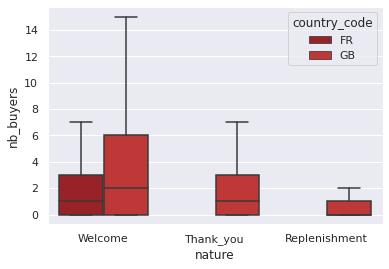

In [ ]:
sns.boxplot(x='nature', y='nb_buyers', hue='country_code', data=ventes_2020, showfliers=False)

##### Panier moyen

In [ ]:
ventes_2020['AOV'].describe()

count    4541.000000
mean       40.892874
std        41.094048
min         0.000000
25%         0.000000
50%        40.087809
75%        66.249563
max       300.000000
Name: AOV, dtype: float64

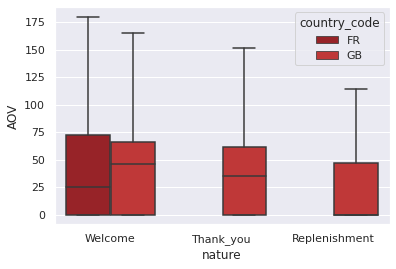

In [ ]:
sns.boxplot(x='nature', y='AOV', hue='country_code', data=ventes_2020, showfliers=False)

###### Chiffre d'affaire et nombre de targets

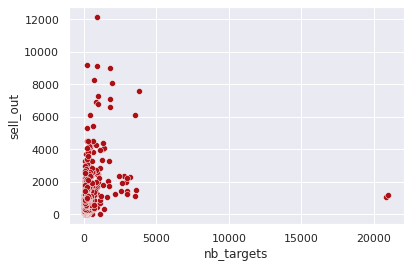

In [ ]:
sns.scatterplot(x='nb_targets', y='sell_out', data=ventes_2020)

###### Chiffre d'affaire et nombre de open

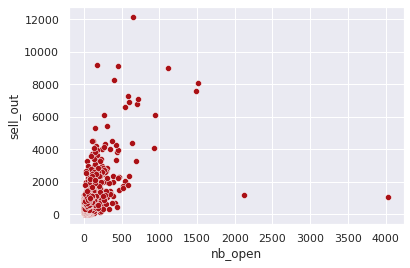

In [ ]:
sns.scatterplot(x='nb_open', y='sell_out', data=ventes_2020)

###### Chiffre d'affaire et nombre de click

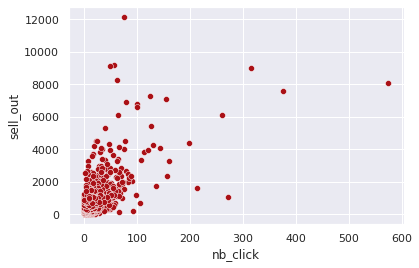

In [ ]:
sns.scatterplot(x='nb_click', y='sell_out', data=ventes_2020)

###### Chiffre d'affaire et nombre de transactions

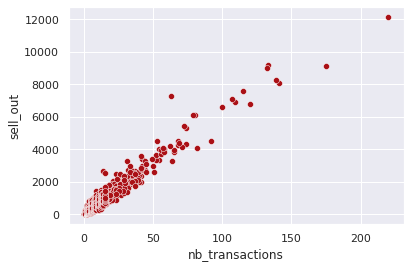

In [ ]:
sns.scatterplot(x='nb_transactions', y='sell_out', data=ventes_2020)

### En 2021

In [ ]:
ventes_2021.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
0,2021-10-31 09:11:34+00:00,FR,Replenishment,Buyer,1,0,0,0,0.0,0,0,0.0,0.0000,0.0,0.0
1,2021-08-05 09:08:38+00:00,FR,Replenishment,Buyer,9,1,0,0,0.0,0,0,0.0,0.1111,0.0,0.0
2,2021-08-21 09:04:34+00:00,FR,Replenishment,Buyer,2,1,0,0,0.0,0,0,0.0,0.5000,0.0,0.0
3,2021-09-08 09:11:45+00:00,FR,Replenishment,Buyer,1,1,0,0,0.0,0,0,0.0,1.0000,0.0,0.0
4,2021-08-31 09:10:36+00:00,FR,Replenishment,Buyer,1,1,0,0,0.0,0,0,0.0,1.0000,0.0,0.0


#### En France

In [ ]:
ventes_FR_2021.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
0,2021-10-31 09:11:34+00:00,FR,Replenishment,Buyer,1,0,0,0,0.0,0,0,0.0,0.0000,0.0,0.0
1,2021-08-05 09:08:38+00:00,FR,Replenishment,Buyer,9,1,0,0,0.0,0,0,0.0,0.1111,0.0,0.0
2,2021-08-21 09:04:34+00:00,FR,Replenishment,Buyer,2,1,0,0,0.0,0,0,0.0,0.5000,0.0,0.0
3,2021-09-08 09:11:45+00:00,FR,Replenishment,Buyer,1,1,0,0,0.0,0,0,0.0,1.0000,0.0,0.0
4,2021-08-31 09:10:36+00:00,FR,Replenishment,Buyer,1,1,0,0,0.0,0,0,0.0,1.0000,0.0,0.0


In [ ]:
ventes_FR_2021.shape
#on se dispode de 12898 variables

(4904, 15)

In [ ]:
ventes_FR_2021.dtypes

delivery_first_contact_date    datetime64[ns, UTC]
country_code                                object
nature                                      object
contact_type                                object
nb_targets                                   int64
nb_open                                      int64
nb_click                                     int64
nb_desabo                                    int64
sell_out                                   float64
nb_transactions                              int64
nb_buyers                                    int64
AOV                                        float64
tx_open                                    float64
tx_click                                   float64
tx_desabo                                  float64
dtype: object

In [ ]:
ventes_FR_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4904 entries, 0 to 6433
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   delivery_first_contact_date  4904 non-null   datetime64[ns, UTC]
 1   country_code                 4904 non-null   object             
 2   nature                       4904 non-null   object             
 3   contact_type                 4904 non-null   object             
 4   nb_targets                   4904 non-null   int64              
 5   nb_open                      4904 non-null   int64              
 6   nb_click                     4904 non-null   int64              
 7   nb_desabo                    4904 non-null   int64              
 8   sell_out                     4904 non-null   float64            
 9   nb_transactions              4904 non-null   int64              
 10  nb_buyers                    4904 non-null   int

In [ ]:
ventes_FR_2021.isnull().sum()
# pas de valeurs manquantes

delivery_first_contact_date    0
country_code                   0
nature                         0
contact_type                   0
nb_targets                     0
nb_open                        0
nb_click                       0
nb_desabo                      0
sell_out                       0
nb_transactions                0
nb_buyers                      0
AOV                            0
tx_open                        0
tx_click                       0
tx_desabo                      0
dtype: int64

#### variables quantitatives

In [ ]:
# summary des variables quantitatives
ventes_FR_2021.describe()

,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
count,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000,4904.000000
mean,88.717374,25.692292,4.147838,0.093393,127.000453,1.256729,1.168230,37.012527,0.341999,0.066512,0.002019
std,424.023927,144.303326,18.135730,0.517140,384.834823,3.523754,3.062548,59.091434,0.306713,0.165122,0.025986
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090900,0.000000,0.000000
50%,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285700,0.000000,0.000000
75%,50.000000,13.000000,2.000000,0.000000,115.425000,1.000000,1.000000,76.230000,0.500000,0.063300,0.000000
max,13588.000000,5484.000000,391.000000,19.000000,7451.820000,57.000000,44.000000,735.000000,1.000000,1.000000,1.000000


##### le maximun de message envoyé est de 17.392 millon messaege par l'année 2021. 
##### 5.484 millon de récepteurs en ouvert ce message.
##### Un chiffre d'affaire de 75.691 million d'euros en 2021 par c'est 3 marques générer en 30 jours apres la réception de l'e mail.
##### il y a 362 mollion de nb de transaction effectuer.
##### Et  191 million de nb de buyers effectuer également.

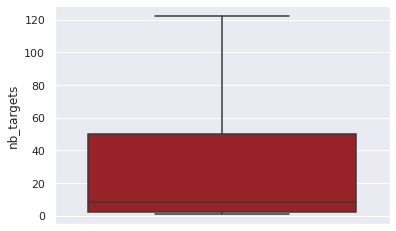

In [ ]:
sns.boxplot(y='nb_targets', data=ventes_FR_2021, showfliers=False)

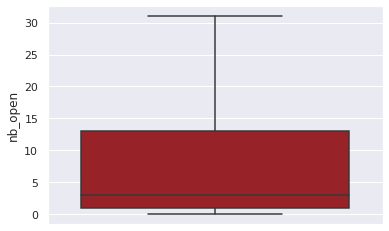

In [ ]:
sns.boxplot(y='nb_open', data=ventes_FR_2021, showfliers=False)

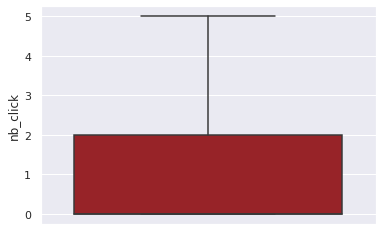

In [ ]:
sns.boxplot(y='nb_click', data=ventes_FR_2021, showfliers=False)

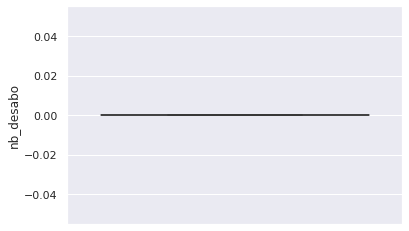

In [ ]:
sns.boxplot(y='nb_desabo', data=ventes_FR_2021, showfliers=False)

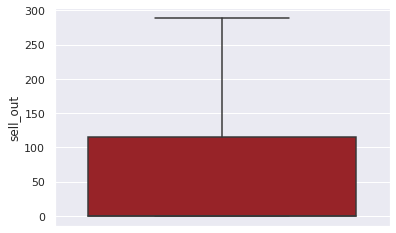

In [ ]:
sns.boxplot(y='sell_out', data=ventes_FR_2021, showfliers=False)

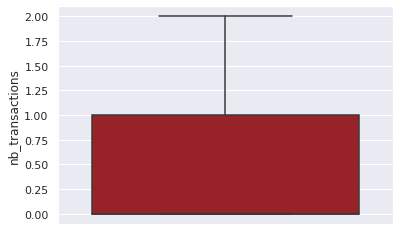

In [ ]:
sns.boxplot(y='nb_transactions', data=ventes_FR_2021, showfliers=False)

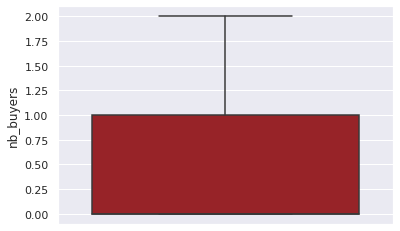

In [ ]:
sns.boxplot(y='nb_buyers', data=ventes_FR_2021, showfliers=False)

#### variables qualitatives

In [ ]:
ventes_FR_2021['nature'].unique()
# on distingue 3 type de nature de messge Replenishment Welcome Thank_you

array(['Replenishment', 'Welcome', 'Thank_you'], dtype=object)

In [ ]:
ventes_FR_2021['nature'].value_counts()
# welcome est le type de message le plus envoyé sur la totalité des messages envoyer par les 3 marques.

Welcome          3637
Replenishment    1235
Thank_you          32
Name: nature, dtype: int64

####Statistiques descriptives bivariées.



##### nature

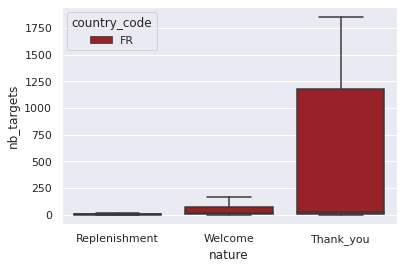

In [ ]:
sns.boxplot(x='nature', y='nb_targets', hue='country_code', data=ventes_FR_2021, showfliers=False)

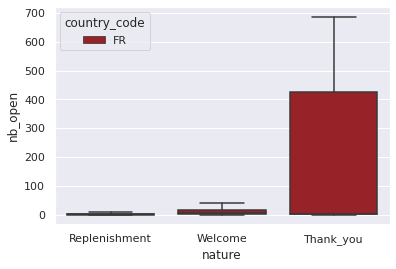

In [ ]:
sns.boxplot(x='nature', y='nb_open', hue='country_code', data=ventes_FR_2021, showfliers=False)

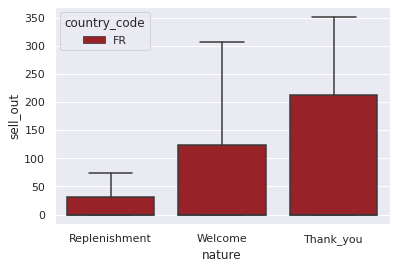

In [ ]:
sns.boxplot(x='nature', y='sell_out', hue='country_code', data=ventes_FR_2021, showfliers=False)

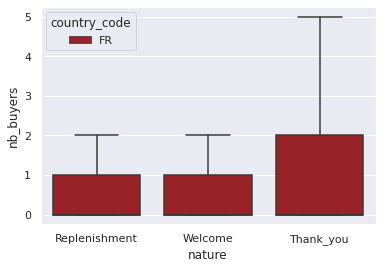

In [ ]:
sns.boxplot(x='nature', y='nb_buyers', hue='country_code', data=ventes_FR_2021, showfliers=False)

##### contrat_type

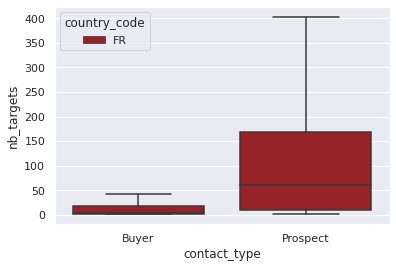

In [ ]:
sns.boxplot(x='contact_type', y='nb_targets', hue='country_code', data=ventes_FR_2021, showfliers=False)

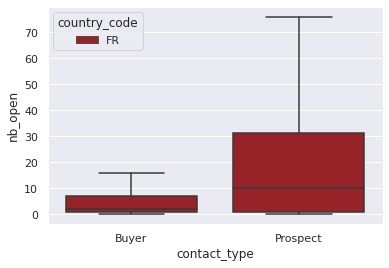

In [ ]:
sns.boxplot(x='contact_type', y='nb_open', hue='country_code', data=ventes_FR_2021, showfliers=False)

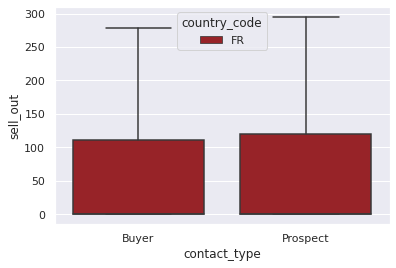

In [ ]:
sns.boxplot(x='contact_type', y='sell_out', hue='country_code', data=ventes_FR_2021, showfliers=False)

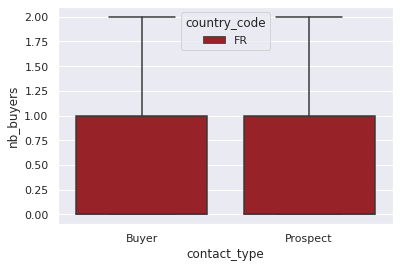

In [ ]:
sns.boxplot(x='contact_type', y='nb_buyers', hue='country_code', data=ventes_FR_2021, showfliers=False)

In [ ]:
A=ventes_FR_2021.groupby(['contact_type']).sum()['sell_out']
A.reset_index()
# le contact buyer fait un chiffre d'affaires qui est multiplié à peu prét par 3 comparant au chiffre d'affaires de Prospect

,contact_type,sell_out
0,Buyer,422888.52
1,Prospect,199921.70


In [ ]:
B=ventes_FR_2021.groupby(['contact_type','nature']).mean()['sell_out']
B.reset_index()

,contact_type,nature,sell_out
0,Buyer,Replenishment,107.342984
1,Buyer,Thank_you,12.022000
2,Buyer,Welcome,140.699065
3,Prospect,Replenishment,0.000000
4,Prospect,Thank_you,255.809091
5,Prospect,Welcome,124.308317


##### relations entre  variables quantitatives

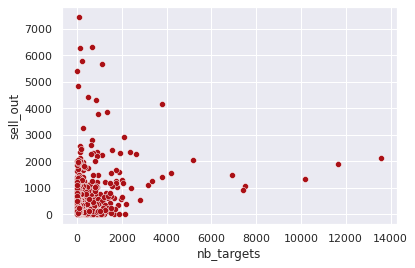

In [ ]:
sns.scatterplot(x='nb_targets', y='sell_out', data=ventes_FR_2021)

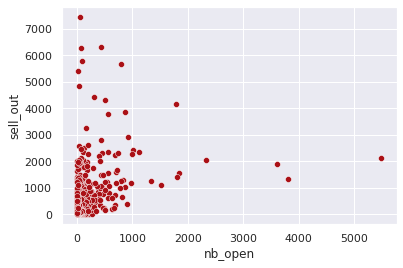

In [ ]:
sns.scatterplot(x='nb_open', y='sell_out', data=ventes_FR_2021)

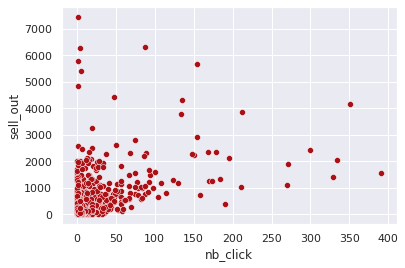

In [ ]:
sns.scatterplot(x='nb_click', y='sell_out', data=ventes_FR_2021)

#### Etude sur la base ventes_2021

In [ ]:
ventes_2021.head()
ventes_2021.shape

(8949, 15)

##### Country code

In [ ]:
pd.crosstab(ventes_2021['country_code'], ventes_2021['nature'])

nature,Replenishment,Thank_you,Welcome
country_code,,,
FR,1235,32,3637
GB,649,331,3065


In [ ]:
pd.crosstab(ventes_2021['country_code'], ventes_2021['contact_type'])

contact_type,Buyer,Prospect
country_code,,
FR,3304,1600
GB,2381,1664


In [ ]:
pd.crosstab(ventes_2021['country_code'], ventes_2021['nb_targets'])

nb_targets,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1659,1681,1732,1735,1764,1800,1809,1854,1859,1864,1908,1931,1958,2020,2028,2056,2087,2148,2177,2368,2393,2649,2810,2902,2903,3166,3192,3204,3224,3342,3815,3816,4186,5168,6913,7435,7485,10176,11655,13588
country_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FR,1121,409,278,204,149,129,110,68,58,68,60,42,45,49,45,46,45,30,35,33,40,28,24,36,32,24,28,33,22,25,23,18,25,17,25,17,10,22,25,20,...,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1
GB,176,94,73,61,53,54,49,53,56,67,64,56,51,49,64,56,56,51,52,35,55,51,38,35,27,38,37,33,30,32,28,24,16,33,27,27,32,20,19,19,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0


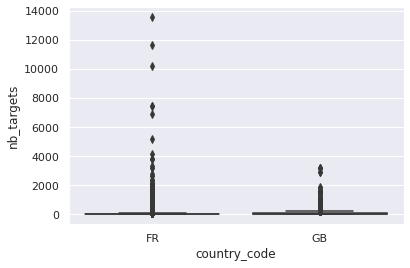

In [ ]:
sns.boxplot(x='country_code', y='nb_targets', data=ventes_2021)

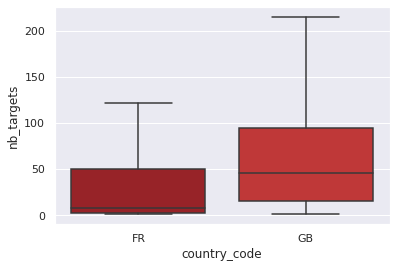

In [ ]:
sns.boxplot(x='country_code', y='nb_targets',showfliers=False, data=ventes_2021)

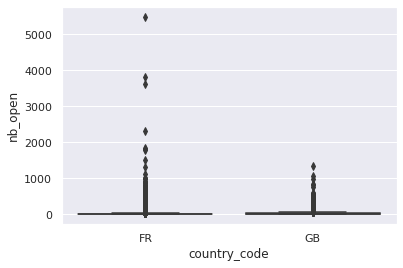

In [ ]:
sns.boxplot(x='country_code', y='nb_open', data=ventes_2021)

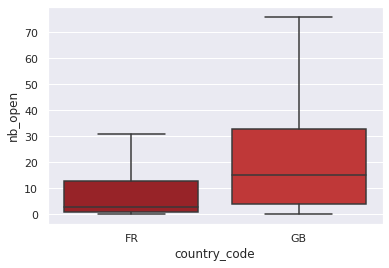

In [ ]:
sns.boxplot(x='country_code', y='nb_open',showfliers=False, data=ventes_2021)

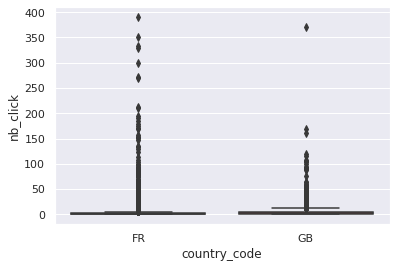

In [ ]:
sns.boxplot(x='country_code', y='nb_click', data=ventes_2021)

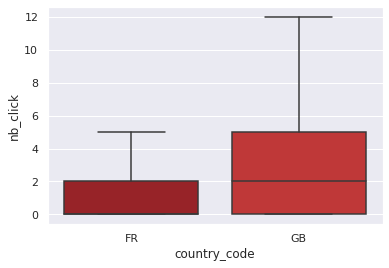

In [ ]:
sns.boxplot(x='country_code', y='nb_click',showfliers=False, data=ventes_2021)

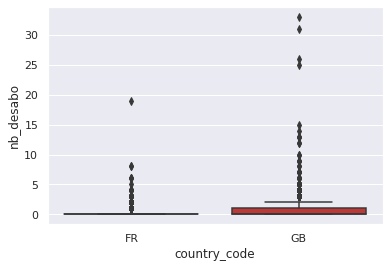

In [ ]:
sns.boxplot(x='country_code', y='nb_desabo', data=ventes_2021)

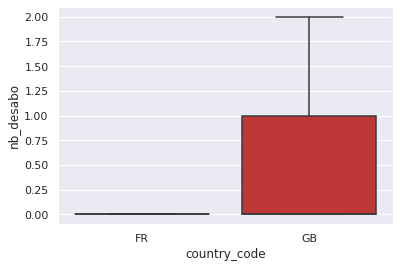

In [ ]:
sns.boxplot(x='country_code', y='nb_desabo',showfliers=False, data=ventes_2021)

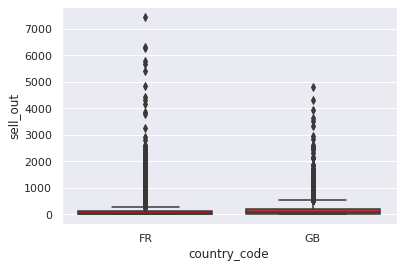

In [ ]:
sns.boxplot(x='country_code', y='sell_out', data=ventes_2021)

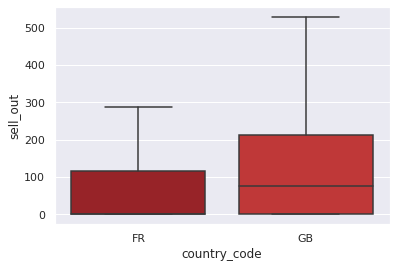

In [ ]:
sns.boxplot(x='country_code', y='sell_out',showfliers=False, data=ventes_2021)

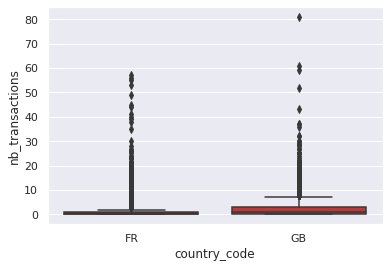

In [ ]:
sns.boxplot(x='country_code', y='nb_transactions', data=ventes_2021)

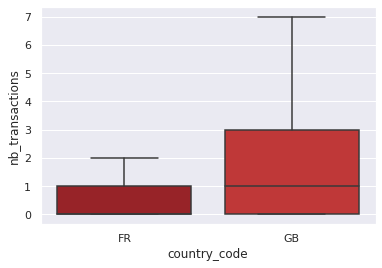

In [ ]:
sns.boxplot(x='country_code', y='nb_transactions',showfliers=False, data=ventes_2021)

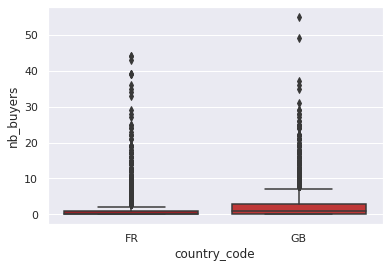

In [ ]:
sns.boxplot(x='country_code', y='nb_buyers', data=ventes_2021)

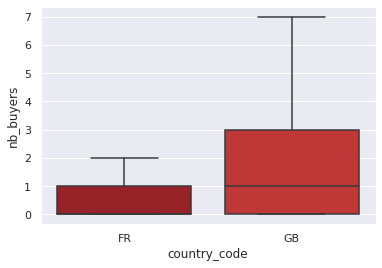

In [ ]:
sns.boxplot(x='country_code', y='nb_buyers',showfliers=False, data=ventes_2021)

###### différence du panier moyen par pays 

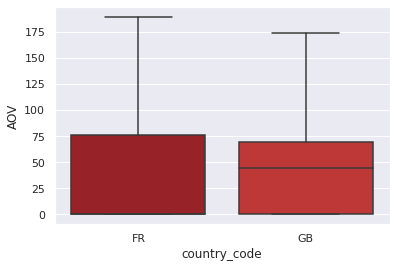

In [ ]:
sns.boxplot(x='country_code', y='AOV',showfliers=False, data=ventes_2021)

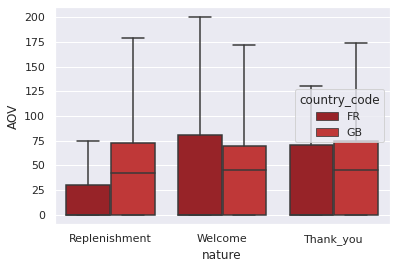

In [ ]:
sns.boxplot(x='nature', y='AOV', hue='country_code', data=ventes_2021, showfliers=False)

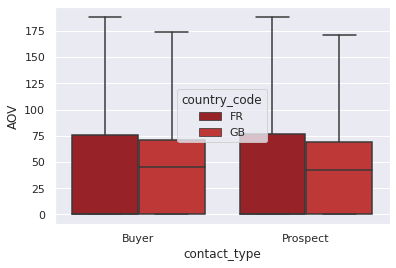

In [ ]:
sns.boxplot(x='contact_type', y='AOV', hue='country_code', data=ventes_2021, showfliers=False)

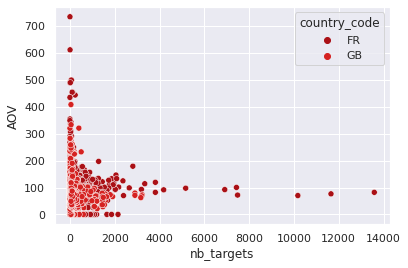

In [ ]:
sns.scatterplot(x='nb_targets', y='AOV',hue='country_code', data=ventes_2021)

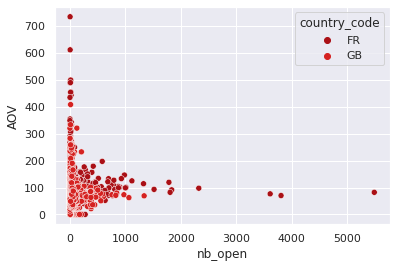

In [ ]:
sns.scatterplot(x='nb_open', y='AOV',hue='country_code', data=ventes_2021)

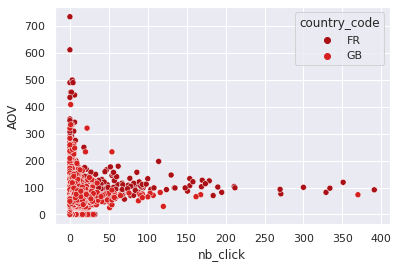

In [ ]:
sns.scatterplot(x='nb_click', y='AOV',hue='country_code', data=ventes_2021)

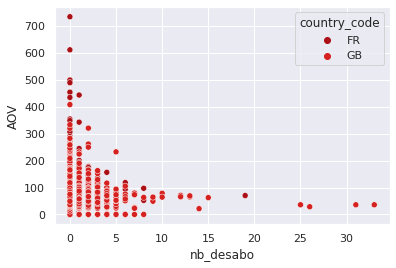

In [ ]:
sns.scatterplot(x='nb_desabo', y='AOV',hue='country_code', data=ventes_2021)

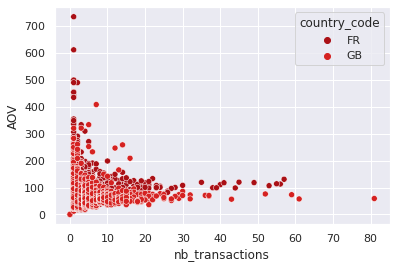

In [ ]:
sns.scatterplot(x='nb_transactions', y='AOV',hue='country_code', data=ventes_2021)

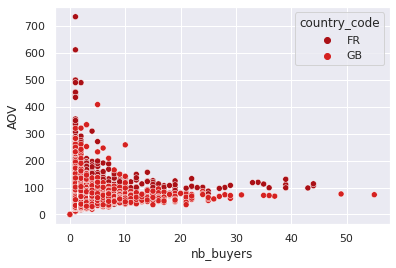

In [ ]:
sns.scatterplot(x='nb_buyers', y='AOV',hue='country_code', data=ventes_2021)

###### différence du nombre de buyers par pays 

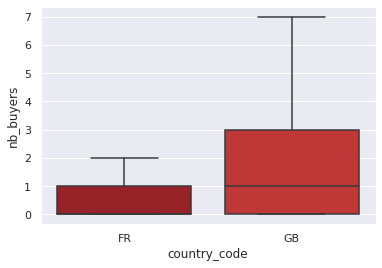

In [ ]:
sns.boxplot(x='country_code', y='nb_buyers',showfliers=False, data=ventes_2021)

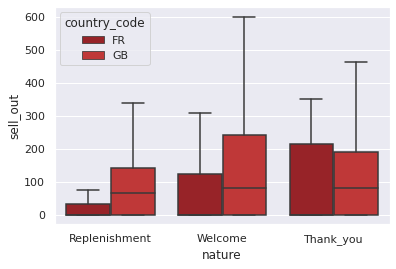

In [ ]:
sns.boxplot(x='nature', y='sell_out', hue='country_code', data=ventes_2021, showfliers=False)

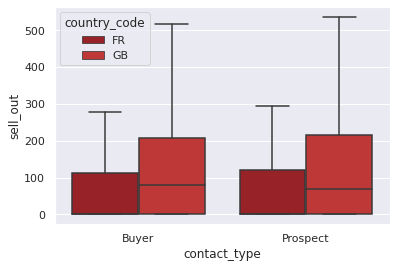

In [ ]:
sns.boxplot(x='contact_type', y='sell_out', hue='country_code', data=ventes_2021, showfliers=False)

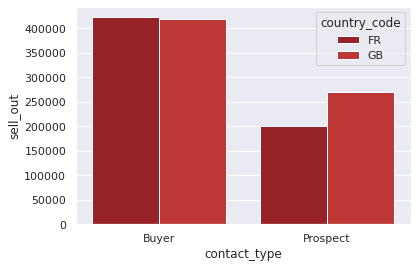

In [ ]:
sns.barplot(x='contact_type', y='sell_out', hue='country_code', data=ventes_2021,estimator=sum,ci=None)

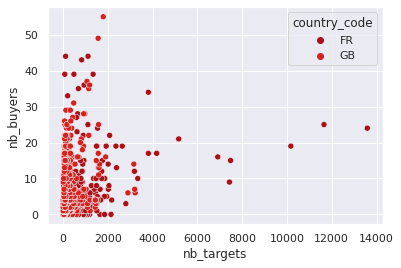

In [ ]:
sns.scatterplot(x='nb_targets', y='nb_buyers',hue='country_code', data=ventes_2021)

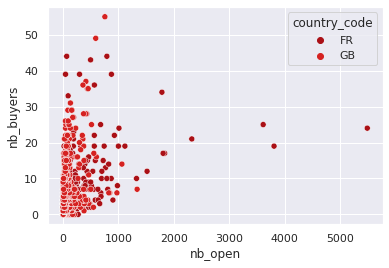

In [ ]:
sns.scatterplot(x='nb_open', y='nb_buyers',hue='country_code', data=ventes_2021)

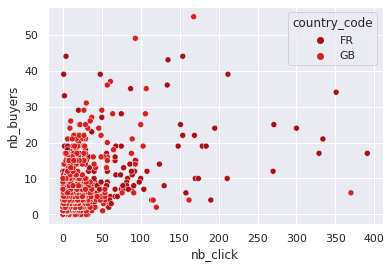

In [ ]:
sns.scatterplot(x='nb_click', y='nb_buyers',hue='country_code', data=ventes_2021)

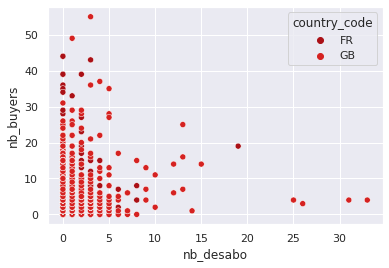

In [ ]:
sns.scatterplot(x='nb_desabo', y='nb_buyers',hue='country_code', data=ventes_2021)

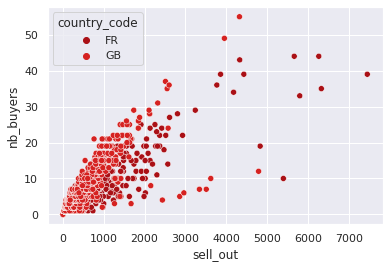

In [ ]:
sns.scatterplot(x='sell_out', y='nb_buyers',hue='country_code', data=ventes_2021)

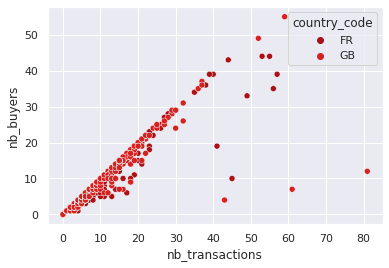

In [ ]:
sns.scatterplot(x='nb_transactions', y='nb_buyers',hue='country_code', data=ventes_2021)

#### Grand Bretagne

In [ ]:
ventes_GB_2021.head()

,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo
0,2021-12-16 18:12:43+00:00,GB,Welcome,Buyer,325,172,20,1,1615.938041,17,16,95.055179,0.5292,0.0615,0.0031
1,2021-12-05 18:07:42+00:00,GB,Welcome,Buyer,482,135,30,0,2321.002741,32,31,72.531336,0.2801,0.0622,0.0000
2,2021-12-03 18:06:28+00:00,GB,Welcome,Buyer,357,181,27,1,1440.660492,22,22,65.484568,0.5070,0.0756,0.0028
3,2021-12-26 18:07:27+00:00,GB,Welcome,Buyer,66,37,3,0,3342.136943,16,7,208.883559,0.5606,0.0455,0.0000
4,2021-11-10 09:08:40+00:00,GB,Welcome,Buyer,161,48,9,0,2575.719285,30,24,85.857310,0.2981,0.0559,0.0000


## Comparaison des années

*Est-ce que l'année a une influence sur le panier moyen ?*

Text(0.5, 1.0, 'Panier moyen par année en France pour YSL Beauté')

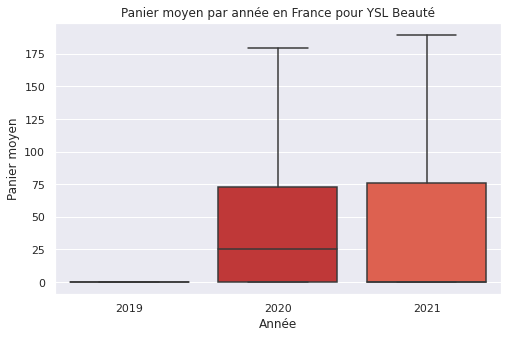

In [ ]:
plt.figure(1, figsize=(8, 5))

ax = sns.boxplot(x='year', y='AOV', data=ventes_FR, showfliers=False, order = ["2019", "2020", "2021"])
ax.set(xlabel='Année', ylabel='Panier moyen')
plt.title("Panier moyen par année en France pour YSL Beauté")

Text(0.5, 1.0, 'Panier moyen par année en Grande-Bretagne pour YSL Beauté')

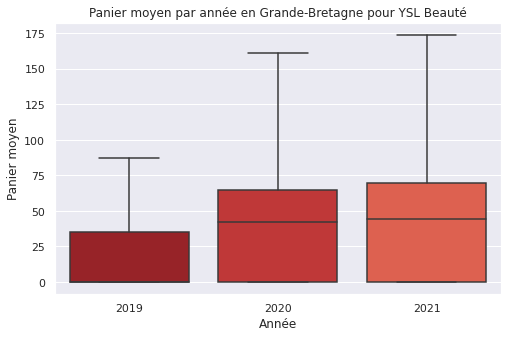

In [ ]:
plt.figure(1, figsize=(8, 5))

ax = sns.boxplot(x='year', y='AOV', data=ventes_GB, showfliers=False, order = ["2019", "2020", "2021"])
ax.set(xlabel='Année', ylabel='Panier moyen')
plt.title("Panier moyen par année en Grande-Bretagne pour YSL Beauté")

In [ ]:
#ANOVA entre sell_out et année
import statsmodels.formula.api;
import statsmodels.api;

fit = statsmodels.formula.api.ols(' nb_targets~ year ', data = ventes).fit()
table = statsmodels.api.stats.anova_lm(fit)

table

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,2.824857e+06,1.412429e+06,9.657737,0.000064
Residual,14428.0,2.110072e+09,1.462484e+05,NaN,NaN


In [ ]:
fit2 = statsmodels.formula.api.ols(' nb_open~ year ', data = ventes).fit()
table2 = statsmodels.api.stats.anova_lm(fit2)

table2

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,4.021539e+05,201076.972699,18.175217,1.307767e-08
Residual,14428.0,1.596206e+08,11063.250427,NaN,NaN


In [ ]:
fit3 = statsmodels.formula.api.ols('nb_click  ~ year  ', data = ventes).fit()
table3 = statsmodels.api.stats.anova_lm(fit3)
table3

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,1.831498e+04,9157.492026,36.963032,9.730719e-17
Residual,14428.0,3.574498e+06,247.747317,NaN,NaN


In [ ]:
fit4 = statsmodels.formula.api.ols('nb_desabo  ~ year  ', data = ventes).fit()
table4 = statsmodels.api.stats.anova_lm(fit4)
table4

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,61.810360,30.905180,32.687783,6.853961e-15
Residual,14428.0,13641.180008,0.945466,NaN,NaN


In [ ]:
fit5 = statsmodels.formula.api.ols('AOV  ~ year  ', data = ventes).fit()
table5 = statsmodels.api.stats.anova_lm(fit5)
table5

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,4.224479e+05,211223.932329,90.530013,8.471633e-40
Residual,14428.0,3.366330e+07,2333.192344,NaN,NaN


In [ ]:
fit6 = statsmodels.formula.api.ols('nb_transactions  ~ year  ', data = ventes).fit()
table6 = statsmodels.api.stats.anova_lm(fit6)
table6

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,23424.292792,11712.146396,264.545883,1.464364e-113
Residual,14428.0,638765.746568,44.272647,NaN,NaN


In [ ]:
fit7 = statsmodels.formula.api.ols('nb_buyers  ~ year  ', data = ventes).fit()
table7 = statsmodels.api.stats.anova_lm(fit7)
table7

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,21767.193490,10883.596745,291.023943,1.238053e-124
Residual,14428.0,539572.559265,37.397599,NaN,NaN


*Est-ce que l'année a une influence sur les différents taux ?*

*   Taux d'ouverture

*   Taux de clics

* Taux de désabonnement

In [ ]:
fit8 = statsmodels.formula.api.ols('tx_open  ~ year  ', data = ventes).fit()
table8 = statsmodels.api.stats.anova_lm(fit8)
table8

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,8.318712,4.159356,62.692244,7.775511e-28
Residual,14428.0,957.234647,0.066346,NaN,NaN


In [ ]:
fit9 = statsmodels.formula.api.ols('tx_click  ~ year  ', data = ventes).fit()
table9 = statsmodels.api.stats.anova_lm(fit9)
table9

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,1.656983,0.828491,40.71438,2.331736e-18
Residual,14428.0,293.593370,0.020349,NaN,NaN


In [ ]:
fit10 = statsmodels.formula.api.ols('tx_desabo  ~ year  ', data = ventes).fit()
table10 = statsmodels.api.stats.anova_lm(fit10)
table10

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,0.004557,0.002278,4.887137,0.007555
Residual,14428.0,6.726361,0.000466,NaN,NaN


En France

In [ ]:
fit11 = statsmodels.formula.api.ols('tx_open  ~ year  ', data = ventes_FR).fit()
table11 = statsmodels.api.stats.anova_lm(fit11)
table11

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,11.210826,5.605413,63.451673,5.148172e-28
Residual,6431.0,568.123874,0.088341,NaN,NaN


In [ ]:
fit12 = statsmodels.formula.api.ols('tx_click  ~ year  ', data = ventes_FR).fit()
table12 = statsmodels.api.stats.anova_lm(fit12)
table12

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,3.089146,1.544573,57.363576,2.027332e-25
Residual,6431.0,173.161256,0.026926,NaN,NaN


In [ ]:
fit13 = statsmodels.formula.api.ols('tx_desabo  ~ year  ', data = ventes_FR).fit()
table13 = statsmodels.api.stats.anova_lm(fit13)
table13

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,0.000250,0.000125,0.212331,0.808703
Residual,6431.0,3.789626,0.000589,NaN,NaN


In [ ]:
fit20 = statsmodels.formula.api.ols('AOV  ~ year  ', data = ventes_FR).fit()
table20 = statsmodels.api.stats.anova_lm(fit20)
table20

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,2.073686e+05,103684.294104,32.071959,1.381434e-14
Residual,6431.0,2.079055e+07,3232.864392,NaN,NaN


In [ ]:
M=ventes_FR.groupby(['year']).mean()['AOV']
M.reset_index()

,year,AOV
0,2019,16.731648
1,2020,41.917773
2,2021,37.012527


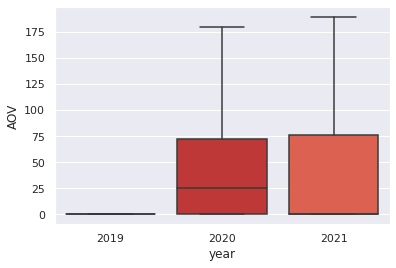

In [ ]:
sns.boxplot(x='year', y='AOV', data=ventes_FR, showfliers=False, order=['2019','2020','2021'])

In [ ]:
ventes_FR['year'].value_counts()

2021    4904
2020    1084
2019     446
Name: year, dtype: int64

In [ ]:
campagnes_nulles2 = ventes_FR.loc[ventes_FR['sell_out'] == 0, : ]

campagnes_nulles2['year'].value_counts()

2021    3070
2020     528
2019     349
Name: year, dtype: int64

In [ ]:
# 2019 78,25% campagnes nulles
# 2020 48,70 % campagnes nulles
# 2021 62,60% campagnes nulles 

In [ ]:
campagnes_nulles2 = ventes_FR.loc[ventes_FR['sell_out'] == 0, : ]

df = campagnes_nulles2['year'].value_counts().reset_index()

df2 = ventes_FR['year'].value_counts().reset_index()

In [ ]:
df

,index,year
0,2021,3070
1,2020,528
2,2019,349


In [ ]:
df2

,index,year
0,2021,4904
1,2020,1084
2,2019,446


In [ ]:
fusion = pd.merge(df, df2)
fusion

,index,year


En GB

In [ ]:
ventes_GB['year'].value_counts()

2021    4045
2020    3457
2019     495
Name: year, dtype: int64

In [ ]:
campagnes_nulles3 = ventes_GB.loc[ventes_GB['sell_out'] == 0, : ]

campagnes_nulles3['year'].value_counts()

2021    1349
2020    1193
2019     320
Name: year, dtype: int64

In [ ]:
#2019 64,64% de campagnes nulles
#2020 34,50% de campagnes nulles
#2021 33,34% de campagnes nulles 

In [ ]:
campagnes_nulles2 = ventes_FR.loc[ventes_FR['sell_out'] == 0, : ]



df = campagnes_nulles2['year'].value_counts().rename_axis('year').reset_index(name='Effectif_nulles')



df2 = ventes_FR['year'].value_counts().rename_axis('year').reset_index(name='Effectif_campagnes')



df = df.merge(df2, how = 'inner', on ='year')



df['Pourcentage_nulles'] = df['Effectif_nulles']/df['Effectif_campagnes']*100



df

,year,Effectif_nulles,Effectif_campagnes,Pourcentage_nulles
0,2021,3070,4904,62.601958
1,2020,528,1084,48.708487
2,2019,349,446,78.251121


In [ ]:
fit14 = statsmodels.formula.api.ols('tx_open  ~ year  ', data = ventes_GB).fit()
table14 = statsmodels.api.stats.anova_lm(fit14)
table14

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,3.766817,1.883409,39.369416,9.676896e-18
Residual,7994.0,382.428042,0.047839,NaN,NaN


In [ ]:
T=ventes_GB.groupby(['year']).mean()['tx_open']
T.reset_index()

,year,tx_open
0,2019,0.279166
1,2020,0.372278
2,2021,0.363145


In [ ]:
fit15 = statsmodels.formula.api.ols('tx_click  ~ year  ', data = ventes_GB).fit()
table15 = statsmodels.api.stats.anova_lm(fit15)
table15

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,0.399103,0.199551,13.486265,0.000001
Residual,7994.0,118.284347,0.014797,NaN,NaN


In [ ]:
T=ventes_GB.groupby(['year']).mean()['tx_click']
T.reset_index()

,year,tx_click
0,2019,0.060697
1,2020,0.075779
2,2021,0.061627


In [ ]:
fit16 = statsmodels.formula.api.ols('tx_desabo  ~ year  ', data = ventes_GB).fit()
table16 = statsmodels.api.stats.anova_lm(fit16)
table16

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,0.013361,0.006680,18.347628,1.121913e-08
Residual,7994.0,2.910664,0.000364,NaN,NaN


In [ ]:
T=ventes_GB.groupby(['year']).mean()['tx_desabo']
T.reset_index()

,year,tx_desabo
0,2019,0.000462
1,2020,0.003611
2,2021,0.005347


In [ ]:
fit21 = statsmodels.formula.api.ols('AOV  ~ year  ', data = ventes_GB).fit()
table21 = statsmodels.api.stats.anova_lm(fit21)
table21

,df,sum_sq,mean_sq,F,PR(>F)
year,2.0,2.631945e+05,131597.250040,82.606246,3.092097e-36
Residual,7994.0,1.273497e+07,1593.066581,NaN,NaN


In [ ]:
T=ventes_GB.groupby(['year']).mean()['AOV']
T.reset_index()

,year,AOV
0,2019,20.543753
1,2020,40.571500
2,2021,44.754727


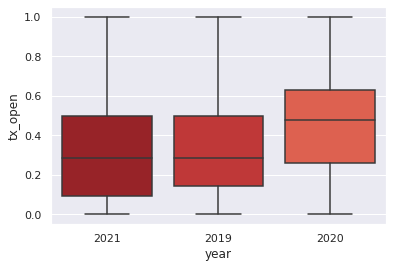

In [ ]:
sns.boxplot(x='year', y='tx_open', data=ventes_FR, showfliers=False)

In [ ]:
O=ventes_FR.groupby(['year']).mean()['tx_open']
O.reset_index()

,year,tx_open
0,2019,0.325416
1,2020,0.451580
2,2021,0.341999


In [ ]:
P=ventes_FR.groupby(['year']).mean()['tx_click']
P.reset_index()

,year,tx_click
0,2019,0.076029
1,2020,0.125495
2,2021,0.066512


In [ ]:
Q=ventes_GB.groupby(['year']).mean()['tx_open']
Q.reset_index()

,year,tx_open
0,2019,0.279166
1,2020,0.372278
2,2021,0.363145


In [ ]:
R=ventes_GB.groupby(['year']).mean()['tx_click']
R.reset_index()

,year,tx_click
0,2019,0.060697
1,2020,0.075779
2,2021,0.061627


In [ ]:
S=ventes_GB.groupby(['year']).mean()['tx_desabo']
S.reset_index()

,year,tx_desabo
0,2019,0.000462
1,2020,0.003611
2,2021,0.005347


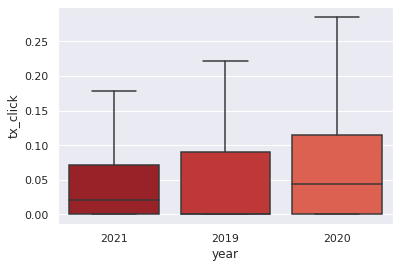

In [ ]:
sns.boxplot(x='year', y='tx_click', data=ventes, showfliers=False)

*Est-ce que l'année a un impact sur le nombre de campagnes effectuées ?*

#### France

In [ ]:
X = "year"
Y = "nature"
cont = ventes_FR[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)

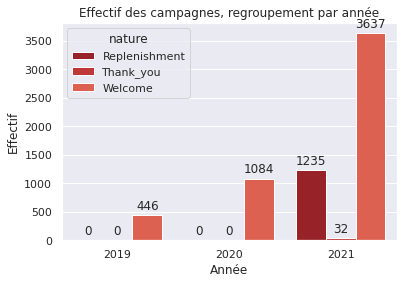

In [ ]:
ct = pd.crosstab(ventes_FR['year'],ventes_FR['nature']) 

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
ax = sns.barplot(x=stacked.year, y=stacked.value, hue=stacked.nature)
ax.set_title("Effectif des campagnes, regroupement par année")
ax.set_xlabel("Année")
ax.set_ylabel('Effectif')

for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

In [ ]:
ct['Total'] = ct.sum(axis=1)

profil_ligne_year_nature = ct.copy()

year = ['2019', '2020', '2021']

for i in year :
    tot = profil_ligne_year_nature.loc[i]['Total']
    profil_ligne_year_nature.loc[i] = profil_ligne_year_nature.loc[i].div(tot)*100

    
profil_ligne_year_nature = profil_ligne_year_nature.round(0)
profil_ligne_year_nature

nature,Replenishment,Thank_you,Welcome,Total
year,,,,
2019,0.0,0.0,100.0,100
2020,0.0,0.0,100.0,100
2021,25.0,1.0,74.0,100


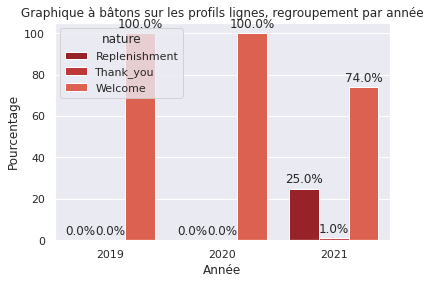

In [ ]:
# now stack and reset
stacked = profil_ligne_year_nature.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})



# plot grouped bar chart
ax = sns.barplot(x=stacked.year, y=stacked.value, hue=stacked.nature)
ax.set_title("Graphique à bâtons sur les profils lignes, regroupement par année")
ax.set_xlabel("Année")
ax.set_ylabel('Pourcentage')


for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    

In [ ]:
# Test du Chi2
import scipy.stats as st

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

st_p


3.2244014467705223e-105

La p-value obtenue par notre échantillon est inférieure à 5%. On peut donc rejeter l’hypothèse nulle. Les variables « year » et « nature » ne sont pas indépendantes.

#### Grande-Bretagne

In [ ]:
X = "year"
Y = "nature"
cont = ventes_GB[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)

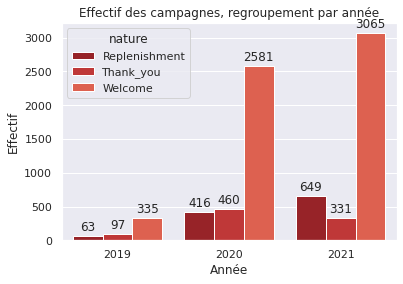

In [ ]:
ct = pd.crosstab(ventes_GB['year'],ventes_GB['nature']) 

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
ax = sns.barplot(x=stacked.year, y=stacked.value, hue=stacked.nature)
ax.set_title("Effectif des campagnes, regroupement par année")
ax.set_xlabel("Année")
ax.set_ylabel('Effectif')

for p in ax.patches: 
    ax.annotate(round(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')

In [ ]:
ct['Total'] = ct.sum(axis=1)

profil_ligne_year_nature = ct.copy()

year = ['2019', '2020', '2021']

for i in year :
    tot = profil_ligne_year_nature.loc[i]['Total']
    profil_ligne_year_nature.loc[i] = profil_ligne_year_nature.loc[i].div(tot)*100

    
profil_ligne_year_nature = profil_ligne_year_nature.round(0)
profil_ligne_year_nature

nature,Replenishment,Thank_you,Welcome,Total
year,,,,
2019,13.0,20.0,68.0,100
2020,12.0,13.0,75.0,100
2021,16.0,8.0,76.0,100


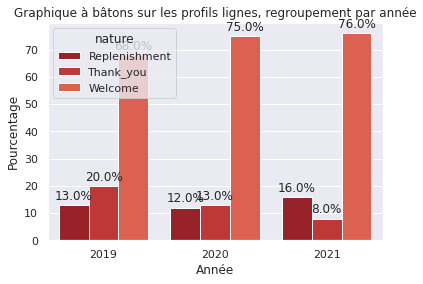

In [ ]:
# now stack and reset
stacked = profil_ligne_year_nature.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})



# plot grouped bar chart
ax = sns.barplot(x=stacked.year, y=stacked.value, hue=stacked.nature)
ax.set_title("Graphique à bâtons sur les profils lignes, regroupement par année")
ax.set_xlabel("Année")
ax.set_ylabel('Pourcentage')


for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    

In [ ]:
# Test du Chi2
import scipy.stats as st

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

st_p


1.2680141363272665e-21

# Serie temporelle

### France

In [ ]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [ ]:
ventes_FR_2019_2020 = ventes.loc[ventes['country_code']=='FR',:]
ventes_FR_2019_2020 = ventes_FR_2019_2020.loc[(ventes_FR_2019_2020['year']=='2019') | (ventes_FR_2019_2020['year']=='2020'),:]

ventes_FR_2019_2020['date'] = [d.date() for d in ventes_FR_2019_2020['delivery_first_contact_date']]
ventes_FR_2019_2020['time'] = [d.time() for d in ventes_FR_2019_2020['delivery_first_contact_date']]
ventes_FR_2019_2020.head()


,year,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo,date,time
426,2019,2019-08-30 13:05:10+00:00,FR,Welcome,Buyer,12,6,3,0,0.0,0,0,0.0,0.5000,0.2500,0.0,2019-08-30,13:05:10
427,2020,2020-04-28 13:01:12+00:00,FR,Welcome,Buyer,9,7,1,0,0.0,0,0,0.0,0.7778,0.1111,0.0,2020-04-28,13:01:12
428,2020,2020-05-21 13:01:00+00:00,FR,Welcome,Buyer,7,3,0,0,0.0,0,0,0.0,0.4286,0.0000,0.0,2020-05-21,13:01:00
429,2020,2020-05-25 13:01:11+00:00,FR,Welcome,Buyer,8,3,2,0,0.0,0,0,0.0,0.3750,0.2500,0.0,2020-05-25,13:01:11
430,2020,2020-05-12 13:01:41+00:00,FR,Welcome,Buyer,7,6,3,0,0.0,0,0,0.0,0.8571,0.4286,0.0,2020-05-12,13:01:41


In [ ]:
ventes_FR_2019_2020=ventes_FR_2019_2020.sort_values(by='date', ascending=True)
ventes_FR_2019_2020.head()

,year,delivery_first_contact_date,country_code,nature,contact_type,nb_targets,nb_open,nb_click,nb_desabo,sell_out,nb_transactions,nb_buyers,AOV,tx_open,tx_click,tx_desabo,date,time
3490,2019,2019-01-01 15:11:52+00:00,FR,Welcome,Prospect,8,4,1,0,27.2,1,1,27.2,0.5000,0.1250,0.0,2019-01-01,15:11:52
1520,2019,2019-01-02 15:12:31+00:00,FR,Welcome,Prospect,10,4,2,0,0.0,0,0,0.0,0.4000,0.2000,0.0,2019-01-02,15:12:31
1497,2019,2019-01-03 15:13:07+00:00,FR,Welcome,Prospect,14,1,1,0,0.0,0,0,0.0,0.0714,0.0714,0.0,2019-01-03,15:13:07
6196,2019,2019-01-04 15:14:13+00:00,FR,Welcome,Buyer,1,0,0,0,35.0,1,1,35.0,0.0000,0.0000,0.0,2019-01-04,15:14:13
1637,2019,2019-01-04 15:14:13+00:00,FR,Welcome,Prospect,11,0,2,0,0.0,0,0,0.0,0.0000,0.1818,0.0,2019-01-04,15:14:13


In [ ]:
ventes_FR_2019_2020=ventes_FR_2019_2020.groupby(['date', 'nature'])['AOV'].sum()
ventes_FR_2019_2020=ventes_FR_2019_2020.reset_index()
ventes_FR_2019_2020=ventes_FR_2019_2020. set_index('date')

#### AOV

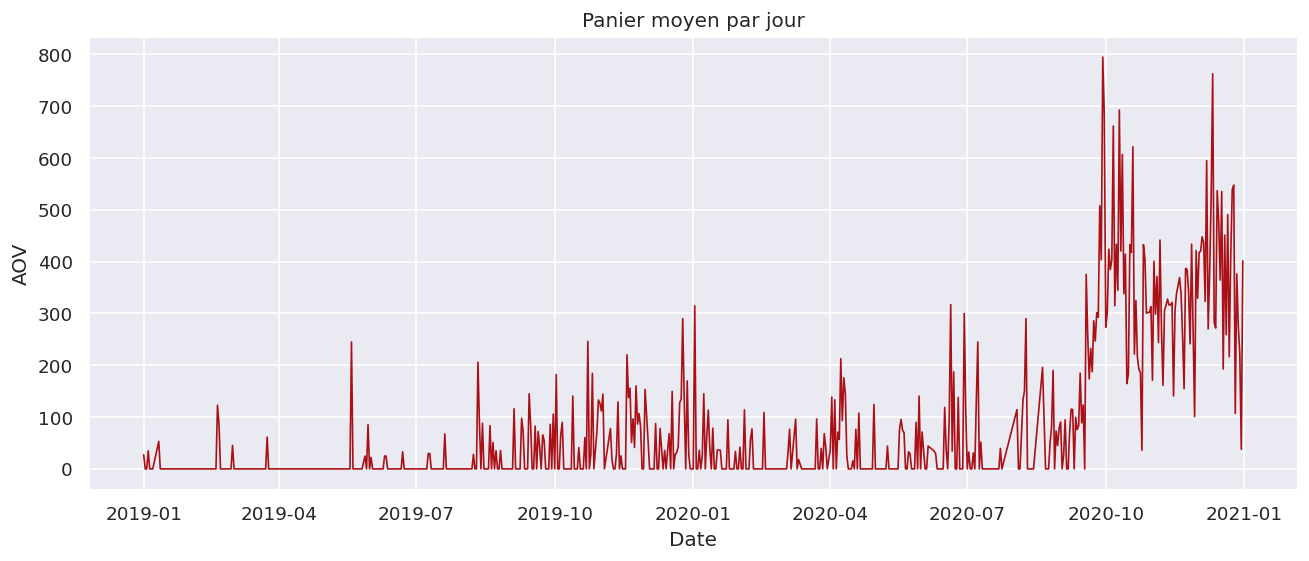

In [ ]:
plt.figure(1, figsize=(13, 5))
ax = sns.lineplot(x = 'date', y='AOV', data=ventes_FR_2019_2020, linewidth=1)
ax.set(xlabel='Date', ylabel='AOV')
plt.title('Panier moyen par jour')
plt.show()

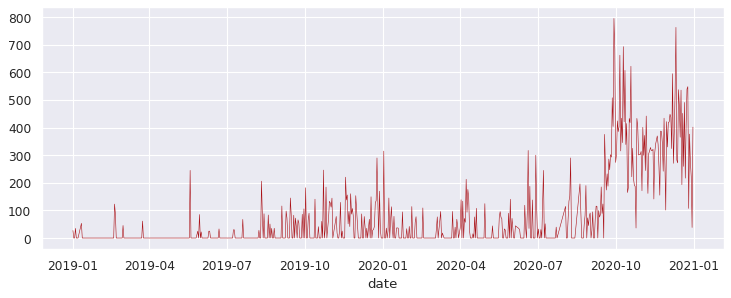

In [ ]:
plt.figure(figsize=(11,4), dpi= 80)
ventes_FR_2019_2020['AOV'].plot(linewidth = 0.5)

In [ ]:
#perform augmented Dickey-Fuller test
adfuller(ventes_FR_2019_2020['AOV'])

(-1.4854750059125081,
 0.5406840193263982,
 20,
 625,
 {'1%': -3.440856177517568, '10%': -2.56923863104, '5%': -2.86617548304384},
 7206.683390298511)

 la série n'est pas stationnaire
 

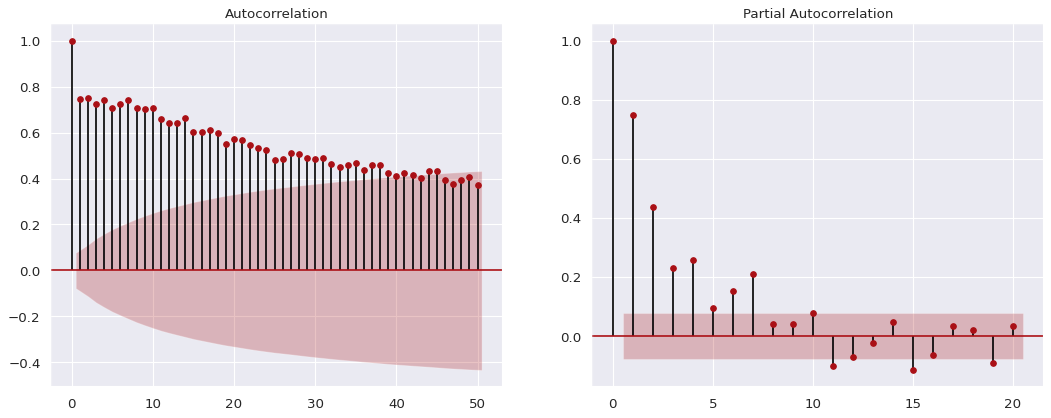

In [ ]:
# Fonction d’Auto-Corrélation (ACF) et la fonction d’Auto-Corrélation Partielle (PACF)
# permettre d indiquer p et q du modele ARMA


# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(ventes_FR_2019_2020['AOV'], ax=ax1, lags=50)
plot_pacf(ventes_FR_2019_2020['AOV'], ax=ax2, lags=20)


# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)


# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


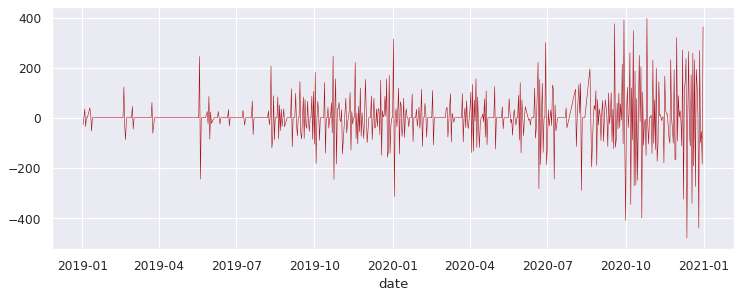

In [ ]:
#defférentiation
plt.figure(figsize=(11,4), dpi= 80)
A=ventes_FR_2019_2020['AOV'].diff().dropna()
A.plot(linewidth = 0.5)
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

In [ ]:
#perform augmented Dickey-Fuller test
adfuller(A)

(-6.375773354474438,
 2.285857175719862e-08,
 19,
 625,
 {'1%': -3.440856177517568, '10%': -2.56923863104, '5%': -2.86617548304384},
 7196.485544244017)

la différentielle est stationnaire

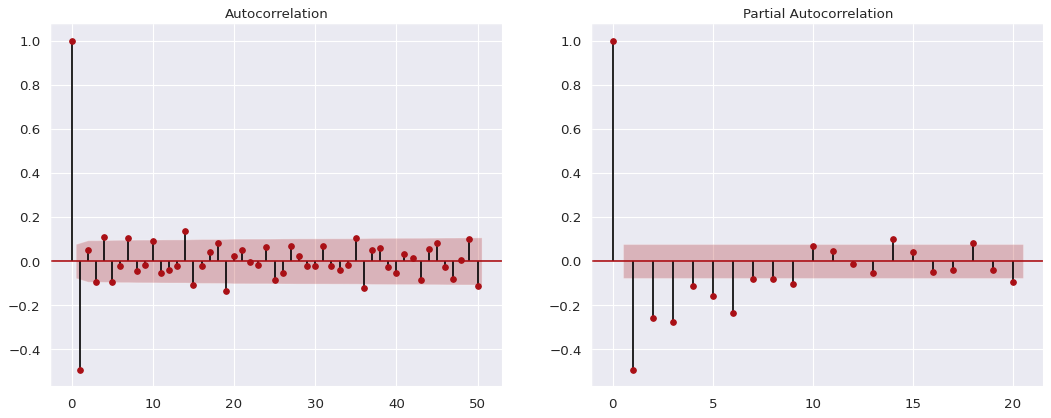

In [ ]:
# Fonction d’Auto-Corrélation (ACF) et la fonction d’Auto-Corrélation Partielle (PACF)
# permettre d indiquer p et q du modele ARMA


# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(A, ax=ax1, lags=50)
plot_pacf(A, ax=ax2, lags=20)


# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)


# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

pmax=6 et qmax=2 apres la différentiation 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(1, 1, 0))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3790.938
Method:                       css-mle   S.D. of innovations             86.337
Date:                Tue, 22 Feb 2022   AIC                           7587.876
Time:                        21:45:18   BIC                           7601.283
Sample:                             1   HQIC                          7593.078
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4061      2.261      0.180      0.858      -4.026       4.838
ar.L1.D.AOV    -0.5041      0.034    -14.647      0.000      -0.572      -0.437
                                    Roots       

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(1, 1, 1))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3719.989
Method:                       css-mle   S.D. of innovations             77.298
Date:                Tue, 22 Feb 2022   AIC                           7447.977
Time:                        21:45:21   BIC                           7465.854
Sample:                             1   HQIC                          7454.914
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4450      0.595      0.747      0.455      -0.722       1.612
ar.L1.D.AOV    -0.0110      0.048     -0.229      0.819      -0.105       0.083
ma.L1.D.AOV    -0.8035      0.027    -29.274    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(1, 1, 2))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3718.259
Method:                       css-mle   S.D. of innovations             77.088
Date:                Tue, 22 Feb 2022   AIC                           7446.518
Time:                        21:45:25   BIC                           7468.865
Sample:                             1   HQIC                          7455.189
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4394      0.601      0.732      0.465      -0.738       1.616
ar.L1.D.AOV    -0.9522      0.055    -17.352      0.000      -1.060      -0.845
ma.L1.D.AOV     0.1247      0.065      1.913    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(2, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                 1529
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -7462.939
Method:                       css-mle   S.D. of innovations             31.864
Date:                Tue, 22 Feb 2022   AIC                          14935.879
Time:                        21:41:15   BIC                          14962.541
Sample:                             1   HQIC                         14945.802
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0473      0.094      0.505      0.613      -0.136       0.231
ar.L1.D.AOV    -0.0583      0.029     -1.991      0.047      -0.116      -0.001
ar.L2.D.AOV     0.0570      0.029      1.992    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(2, 1, 2))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3718.068
Method:                       css-mle   S.D. of innovations             77.065
Date:                Tue, 22 Feb 2022   AIC                           7448.136
Time:                        21:30:48   BIC                           7474.952
Sample:                             1   HQIC                          7458.541
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4451      0.589      0.756      0.450      -0.710       1.600
ar.L1.D.AOV    -0.9119      0.091     -9.973      0.000      -1.091      -0.733
ar.L2.D.AOV     0.0314      0.051      0.619    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(3, 1, 0))
results = model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                 1529
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -7571.610
Method:                       css-mle   S.D. of innovations             34.221
Date:                Tue, 22 Feb 2022   AIC                          15153.221
Time:                        21:41:18   BIC                          15179.882
Sample:                             1   HQIC                         15163.144
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0432      0.357      0.121      0.904      -0.657       0.744
ar.L1.D.AOV    -0.7724      0.025    -31.077      0.000      -0.821      -0.724
ar.L2.D.AOV    -0.4429      0.030    -14.929    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(3, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                 1529
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -7459.918
Method:                       css-mle   S.D. of innovations             31.801
Date:                Tue, 22 Feb 2022   AIC                          14931.835
Time:                        21:41:24   BIC                          14963.830
Sample:                             1   HQIC                         14943.743
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0467      0.097      0.479      0.632      -0.144       0.238
ar.L1.D.AOV    -0.0725      0.030     -2.402      0.016      -0.132      -0.013
ar.L2.D.AOV     0.0365      0.030      1.217    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(3, 1, 2))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                 1529
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -7458.668
Method:                       css-mle   S.D. of innovations             31.775
Date:                Tue, 22 Feb 2022   AIC                          14931.336
Time:                        21:41:26   BIC                          14968.663
Sample:                             1   HQIC                         14945.228
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0464      0.104      0.447      0.655      -0.157       0.250
ar.L1.D.AOV     0.5008      0.400      1.253      0.210      -0.282       1.284
ar.L2.D.AOV     0.0679      0.041      1.675    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(4, 1, 0))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ----------


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                 1529
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -7522.100
Method:                       css-mle   S.D. of innovations             33.128
Date:                Tue, 22 Feb 2022   AIC                          15056.200
Time:                        21:41:28   BIC                          15088.194
Sample:                             1   HQIC                         15068.107
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0399      0.277      0.144      0.885      -0.502       0.582
ar.L1.D.AOV    -0.8314      0.025    -33.583      0.000      -0.880      -0.783
ar.L2.D.AOV    -0.5541      0.031    -18.016    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(4, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -3717.532
Method:                       css-mle   S.D. of innovations             77.002
Date:                Tue, 22 Feb 2022   AIC                           7449.065
Time:                        21:30:50   BIC                           7480.350
Sample:                             1   HQIC                          7461.204
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4353      0.615      0.708      0.479      -0.770       1.641
ar.L1.D.AOV    -0.0423      0.064     -0.660      0.510      -0.168       0.083
ar.L2.D.AOV    -0.0168      0.056     -0.302    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(4, 1, 2))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -3717.088
Method:                       css-mle   S.D. of innovations             76.949
Date:                Tue, 22 Feb 2022   AIC                           7450.176
Time:                        21:30:51   BIC                           7485.930
Sample:                             1   HQIC                          7464.049
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4366      0.611      0.714      0.475      -0.761       1.634
ar.L1.D.AOV    -0.4520      0.371     -1.219      0.223      -1.179       0.275
ar.L2.D.AOV    -0.0248      0.071     -0.347    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(5, 1, 0))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3729.109
Method:                       css-mle   S.D. of innovations             78.410
Date:                Tue, 22 Feb 2022   AIC                           7472.218
Time:                        21:30:52   BIC                           7503.502
Sample:                             1   HQIC                          7484.356
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3653      0.984      0.371      0.711      -1.563       2.293
ar.L1.D.AOV    -0.7576      0.039    -19.424      0.000      -0.834      -0.681
ar.L2.D.AOV    -0.5472      0.048    -11.358    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(5, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -3712.777
Method:                       css-mle   S.D. of innovations             76.431
Date:                Tue, 22 Feb 2022   AIC                           7441.554
Time:                        21:30:53   BIC                           7477.308
Sample:                             1   HQIC                          7455.427
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4217      0.630      0.670      0.503      -0.813       1.656
ar.L1.D.AOV    -0.1486      0.072     -2.052      0.041      -0.291      -0.007
ar.L2.D.AOV    -0.1139      0.063     -1.822    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(5, 1, 2))
results1 = model.fit()
print(results1.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  the underlying index is a RangeIndex or an integral index.


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -3708.096
Method:                       css-mle   S.D. of innovations             75.870
Date:                Tue, 22 Feb 2022   AIC                           7434.192
Time:                        21:45:41   BIC                           7474.415
Sample:                             1   HQIC                          7449.799
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4019      0.716      0.561      0.575      -1.002       1.806
ar.L1.D.AOV     0.5574      0.158      3.525      0.000       0.247       0.867
ar.L2.D.AOV    -0.1479      0.054     -2.742    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(6, 1, 0))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -3711.616
Method:                       css-mle   S.D. of innovations             76.292
Date:                Tue, 22 Feb 2022   AIC                           7439.231
Time:                        21:30:57   BIC                           7474.985
Sample:                             1   HQIC                          7453.104
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3912      0.778      0.503      0.615      -1.133       1.916
ar.L1.D.AOV    -0.7927      0.038    -20.647      0.000      -0.868      -0.717
ar.L2.D.AOV    -0.6045      0.048    -12.637    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(6, 1, 1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -3708.290
Method:                       css-mle   S.D. of innovations             75.895
Date:                Tue, 22 Feb 2022   AIC                           7434.581
Time:                        21:31:00   BIC                           7474.804
Sample:                             1   HQIC                          7450.188
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4180      0.650      0.643      0.520      -0.856       1.692
ar.L1.D.AOV    -0.3695      0.121     -3.066      0.002      -0.606      -0.133
ar.L2.D.AOV    -0.2849      0.097     -2.938    

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ventes_FR_2019_2020['AOV'], order=(6, 1, 2))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.AOV   No. Observations:                  645
Model:                 ARIMA(6, 1, 2)   Log Likelihood               -3708.109
Method:                       css-mle   S.D. of innovations             75.874
Date:                Tue, 22 Feb 2022   AIC                           7436.218
Time:                        21:31:03   BIC                           7480.910
Sample:                             1   HQIC                          7453.559
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4187      0.646      0.649      0.517      -0.847       1.684
ar.L1.D.AOV    -0.5365      0.240     -2.231      0.026      -1.008      -0.065
ar.L2.D.AOV    -0.3017      0.100     -3.003    

le meilleur modele est ARIMA(5,1,2) puisqu'il admet 

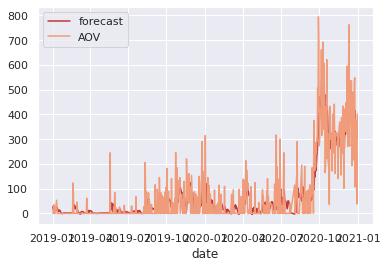

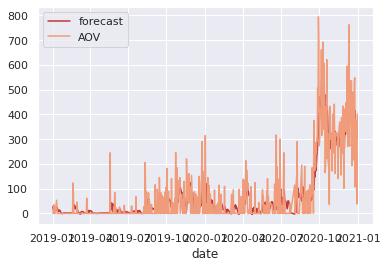

In [ ]:
results1.plot_predict(dynamic=False)
plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


<Figure size 880x320 with 0 Axes>

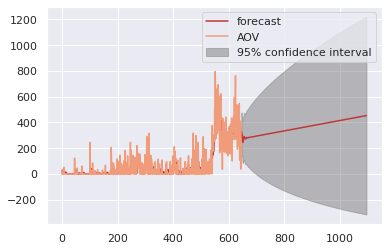

In [ ]:
#The prediction

plt.figure(figsize=(11,4), dpi= 80)
sns.set_theme(palette = "RdBu")

fig = results1.plot_predict(1,1096)